# Exploration (Regression Exercises)

## Exercises

### Info

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

### 1. 

As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

### 2. 

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

### 3. 

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [2]:
from wrangle import wrangle_zillow, check_columns, split_data
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
)

In [3]:
df = wrangle_zillow()

In [4]:
check_columns(df)

Column Name  Number of Unique Values  \
0        year                      153   
1        beds                       19   
2       baths                       38   
3      sqfeet                    10557   
4  prop_value                   588178   
5    prop_tax                    46583   
6      county                        3   

                                       Unique Values  Number of Null Values  \
0  [2005, 2011, 1926, 1972, 1973, 1960, 1950, 195...                      0   
1  [4, 3, 0, 5, 2, 1, 6, 7, 8, 9, 25, 10, 11, 14,...                      0   
2  [2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...                      0   
3  [3633, 1620, 2077, 1200, 171, 203, 1244, 1300,...                      0   
4  [296425, 847770, 646760, 5328, 6920, 14166, 16...                      0   
5  [6941, 10244, 7924, 91, 255, 163, 2532, 3110, ...                      0   
6                              [LA, Orange, Ventura]                      0   

   Proportion of Null Values    dtype  
0                        0.0    int64  
1                        0.0    int64  
2                        0.0  float64  
3                        0.0    int64  
4                        0.0    int64  
5                        0.0    int64  
6                        0.0   object

In [5]:
train, validate, test = split_data(df)

train: 1284141 (60% of 2140235)
validate: 428047 (20% of 2140235)
test: 428047 (20% of 2140235)


In [6]:
# Make sample DF

sm_df = df.sample(n=10_000, random_state=123)

In [8]:
sm_df["year"].min()

1885

In [13]:
# create a new column with binned years for better visuals
sm_df["decade"] = pd.cut(
    sm_df["year"], bins=range(1880, 2021, 10), labels=range(1880, 2020, 10)
)

# Create a new column 'sqfeet_binned' in the 'sm_df' dataframe
# The new column will contain the binned values of the 'sqfeet' column
# The bins are defined using the 'bins' parameter of the 'pd.cut()' function
# The 'bins' parameter specifies the edges of the bins to be used
# In this case, the bins are defined to be 0-999, 1000-1999, ..., 9000-9999
# The 'labels' parameter specifies the labels to use for each bin
# In this case, the labels are defined to be 0, 1000, 2000, ..., 9000
sm_df["sqfeet_binned"] = pd.cut(
    sm_df["sqfeet"], bins=range(0, 13001, 1000), labels=range(0, 13000, 1000)
)

sm_df["decade"] = sm_df["decade"].astype(int)
sm_df["sqfeet_binned"] = sm_df["sqfeet_binned"].astype(int)

In [14]:
check_columns(sm_df)

Column Name  Number of Unique Values  \
0           year                      124   
1           beds                       10   
2          baths                       18   
3         sqfeet                     2888   
4     prop_value                     9307   
5       prop_tax                     6425   
6         county                        3   
7         decade                       14   
8  sqfeet_binned                       13   

                                       Unique Values  Number of Null Values  \
0  [1963, 1998, 1992, 1950, 1958, 1962, 1955, 201...                      0   
1                     [3, 2, 4, 6, 5, 1, 7, 8, 9, 0]                      0   
2  [2.0, 2.5, 3.5, 3.0, 1.0, 4.0, 6.0, 4.5, 5.0, ...                      0   
3  [1410, 1927, 3293, 1568, 1255, 1511, 1300, 270...                      0   
4  [186697, 587421, 796473, 848481, 251385, 85611...                      0   
5  [2762, 7195, 9392, 10316, 3129, 1273, 4528, 13...                      0   
6                              [LA, Orange, Ventura]                      0   
7  [1960, 1990, 1940, 1950, 2010, 1980, 2000, 193...                      0   
8  [1000, 3000, 2000, 0, 4000, 6000, 9000, 5000, ...                      0   

   Proportion of Null Values    dtype  
0                        0.0    int64  
1                        0.0    int64  
2                        0.0  float64  
3                        0.0    int64  
4                        0.0    int64  
5                        0.0    int64  
6                        0.0   object  
7                        0.0    int64  
8                        0.0    int64

### 4. 

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

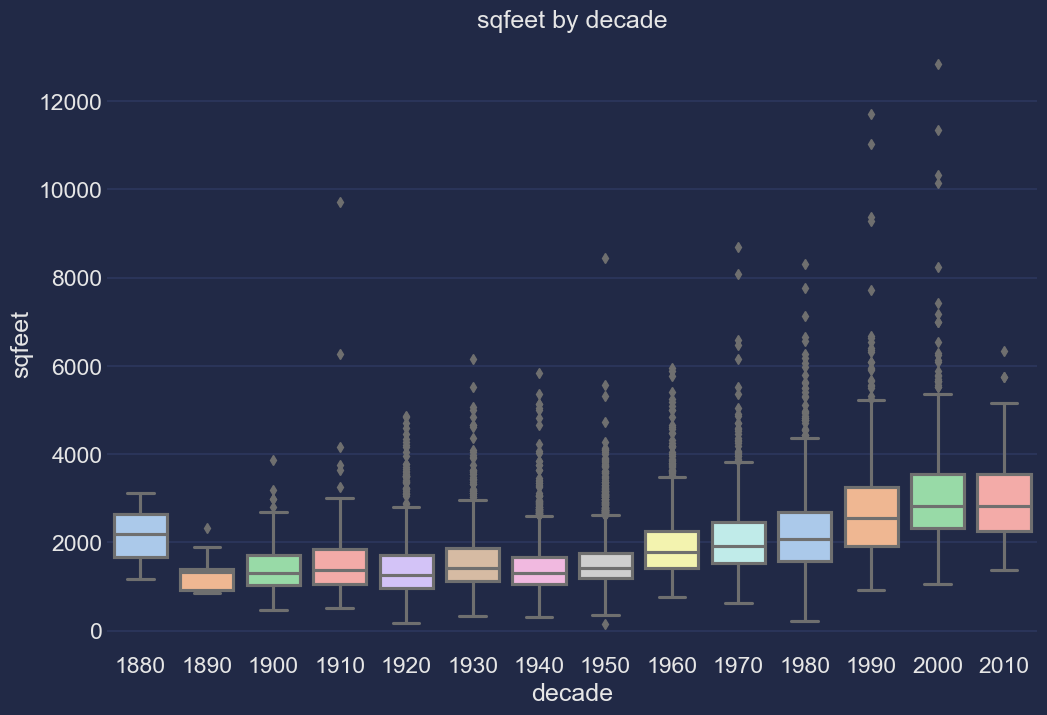

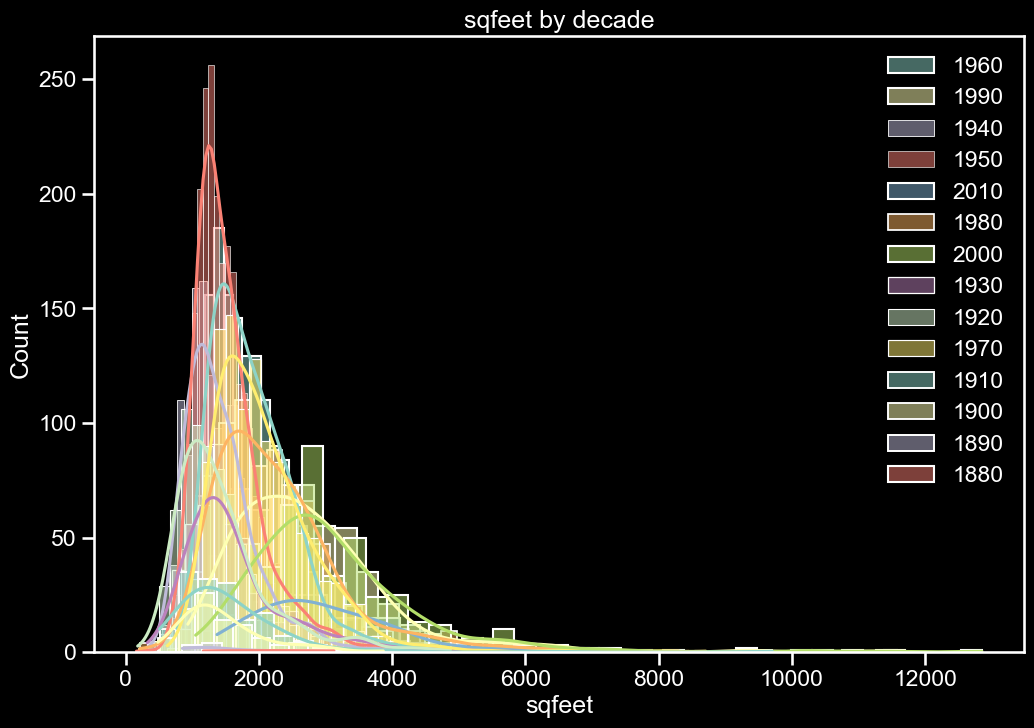

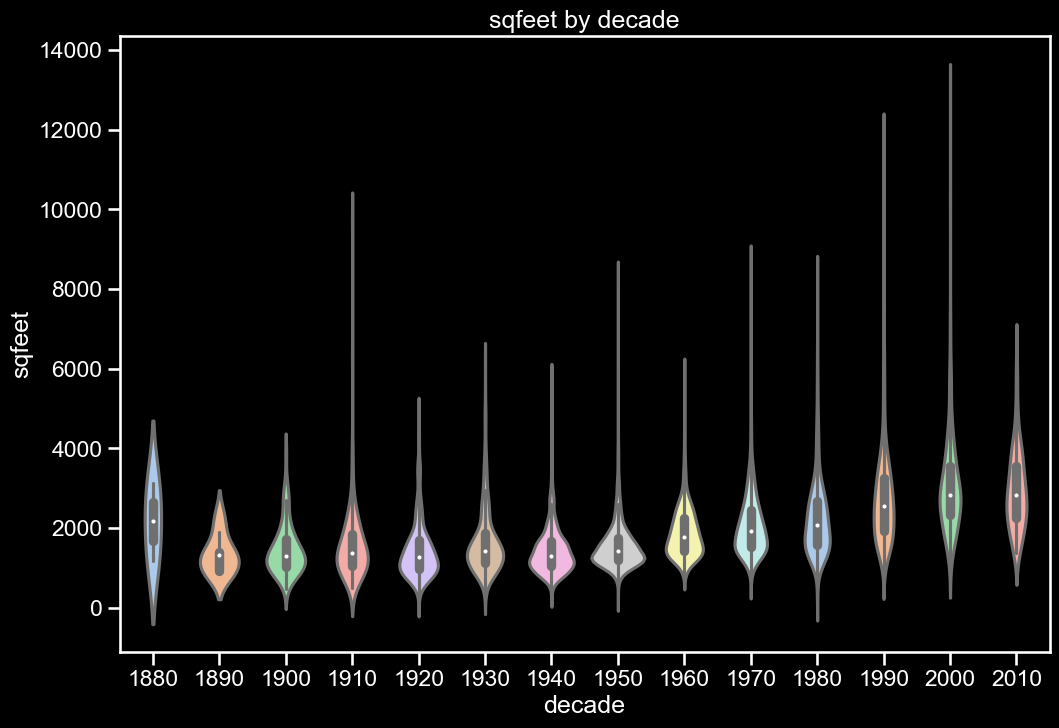

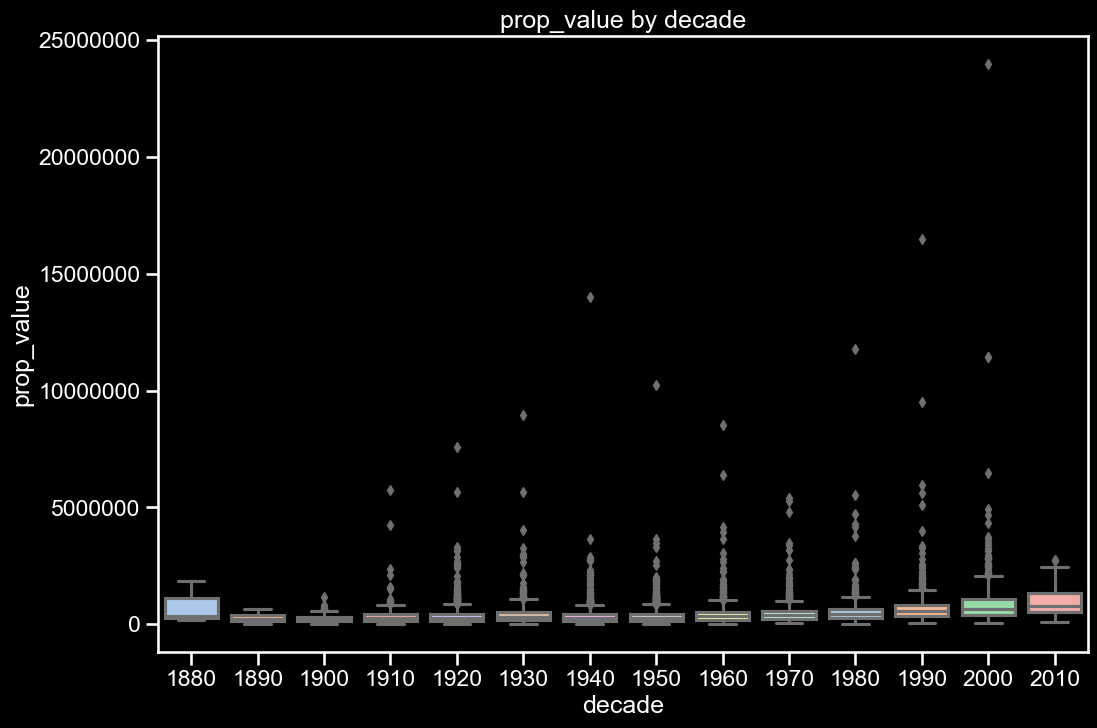

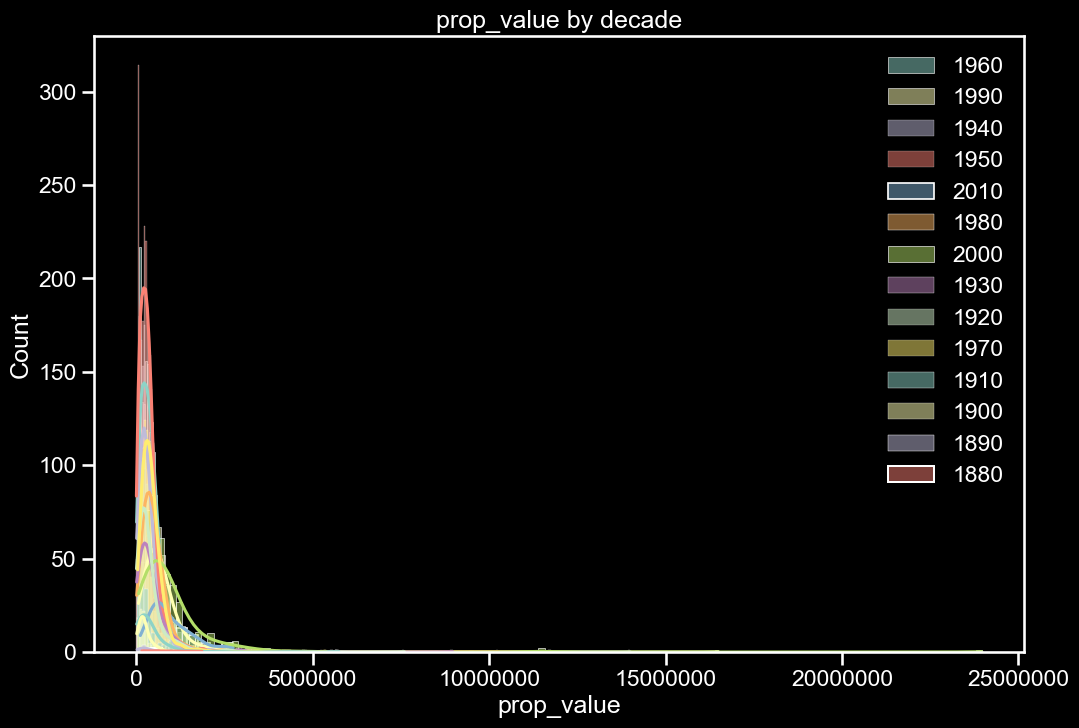

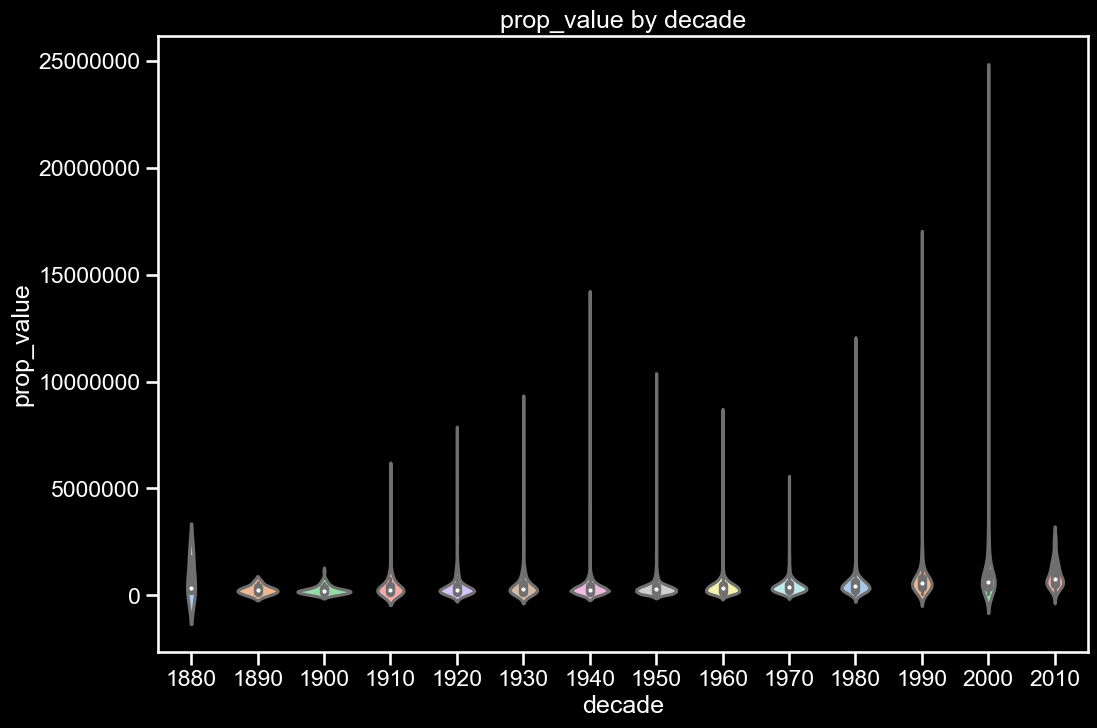

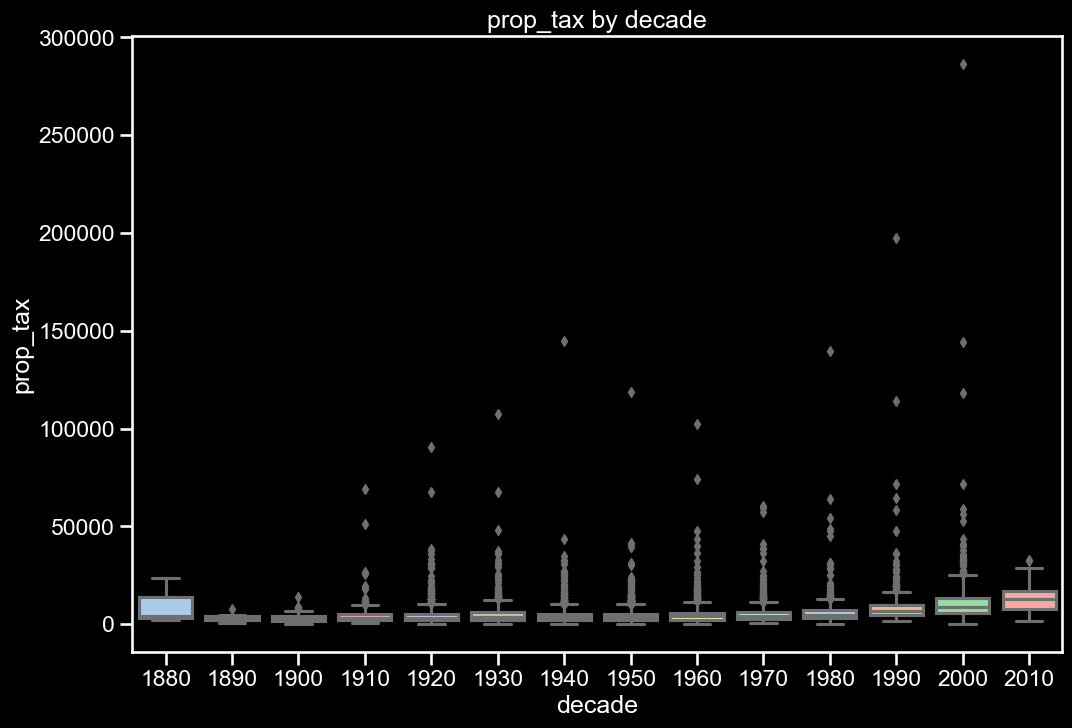

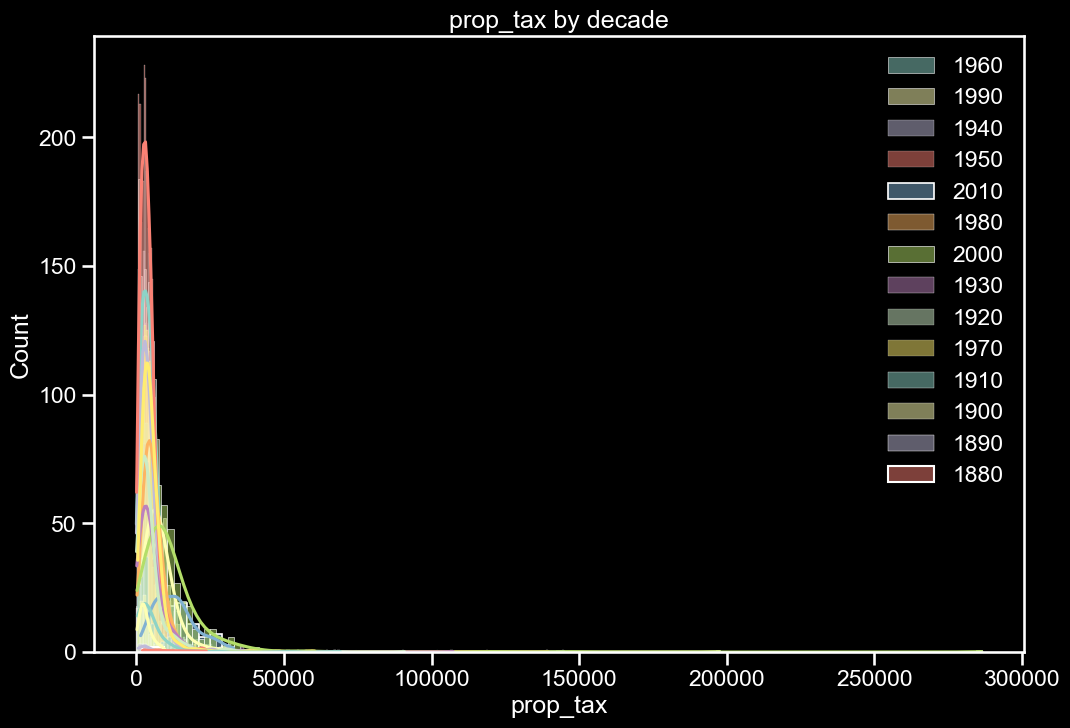

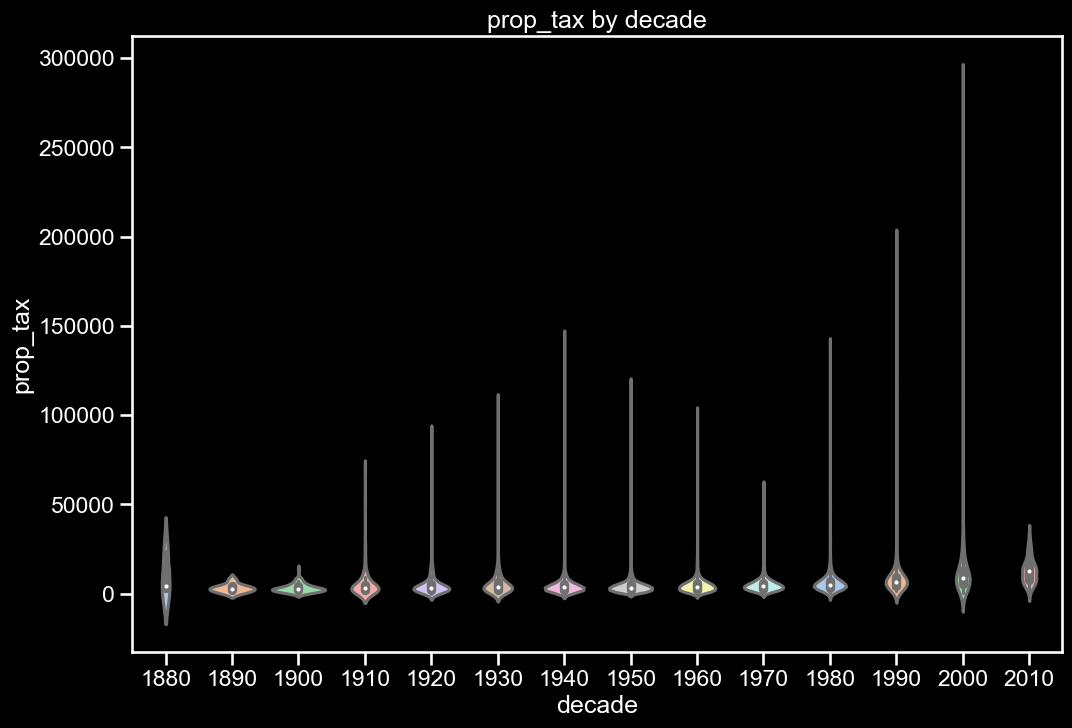

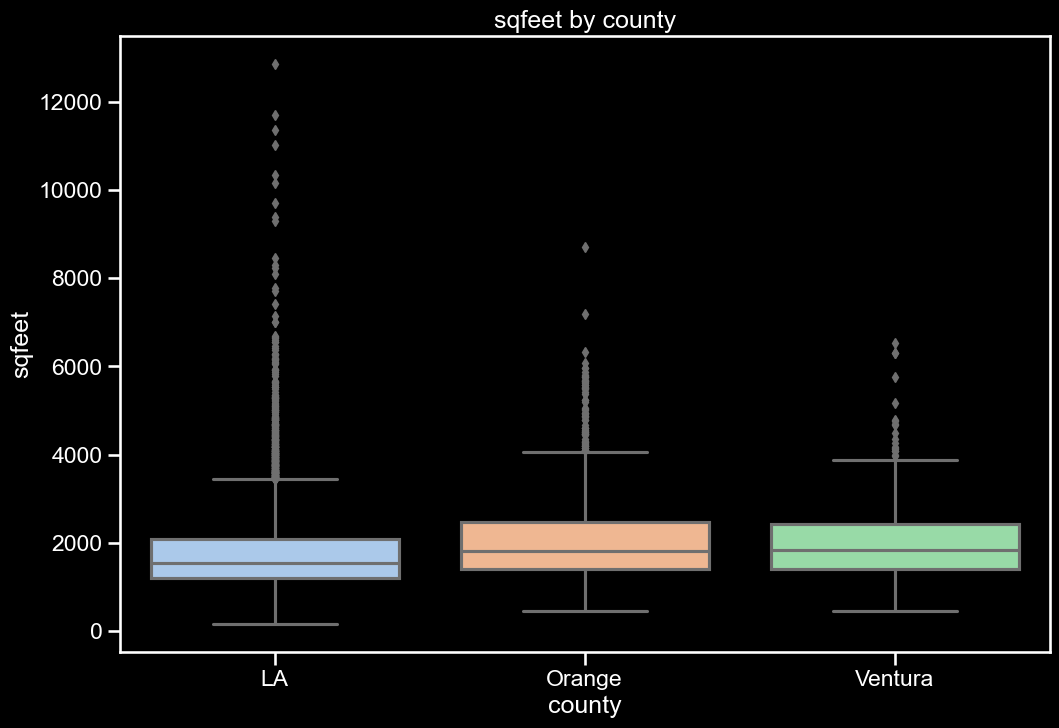

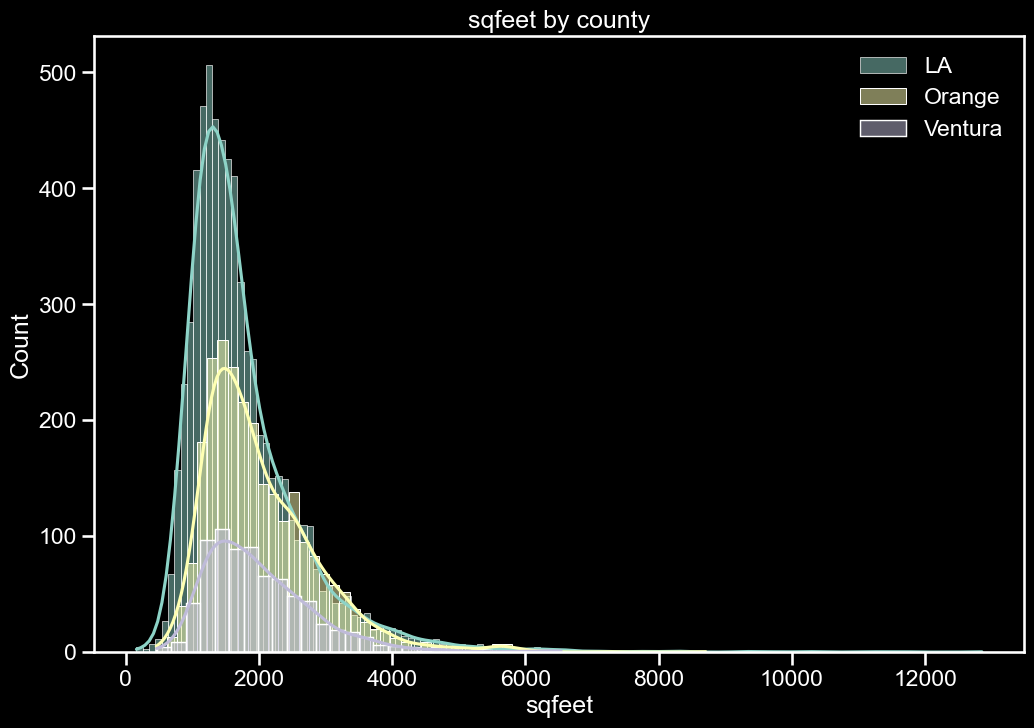

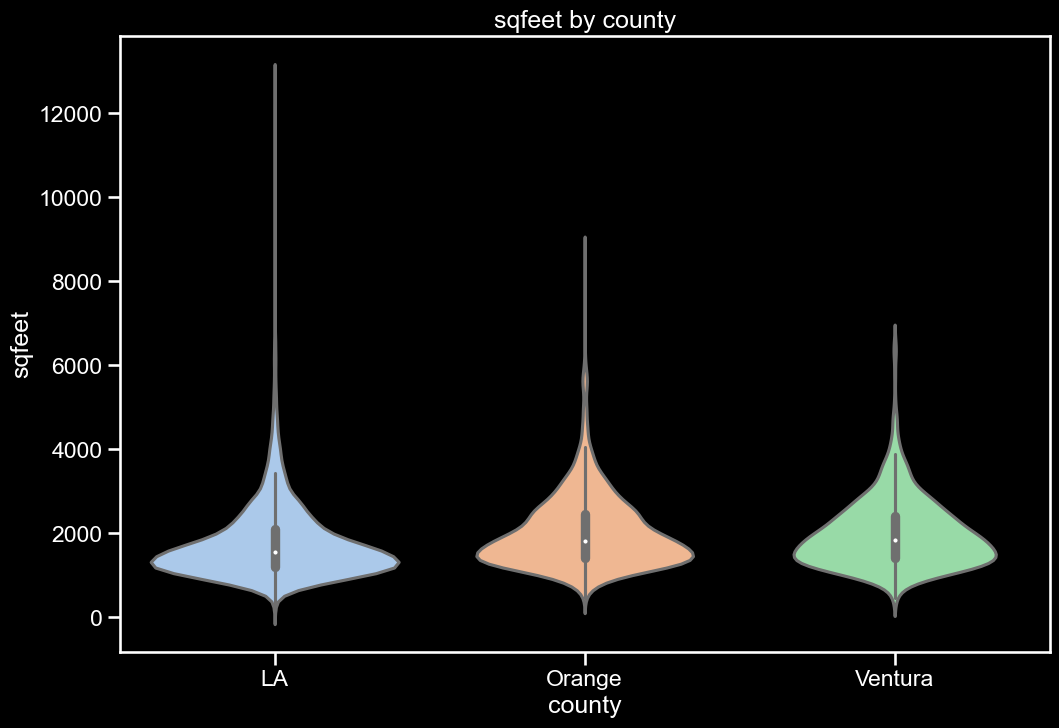

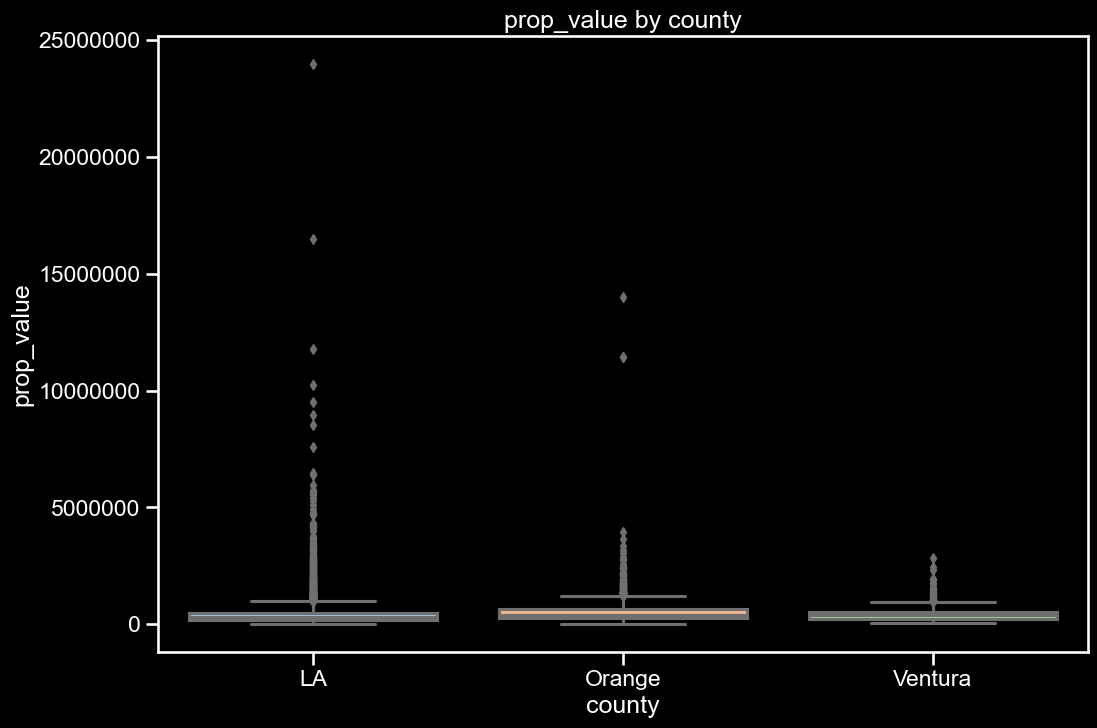

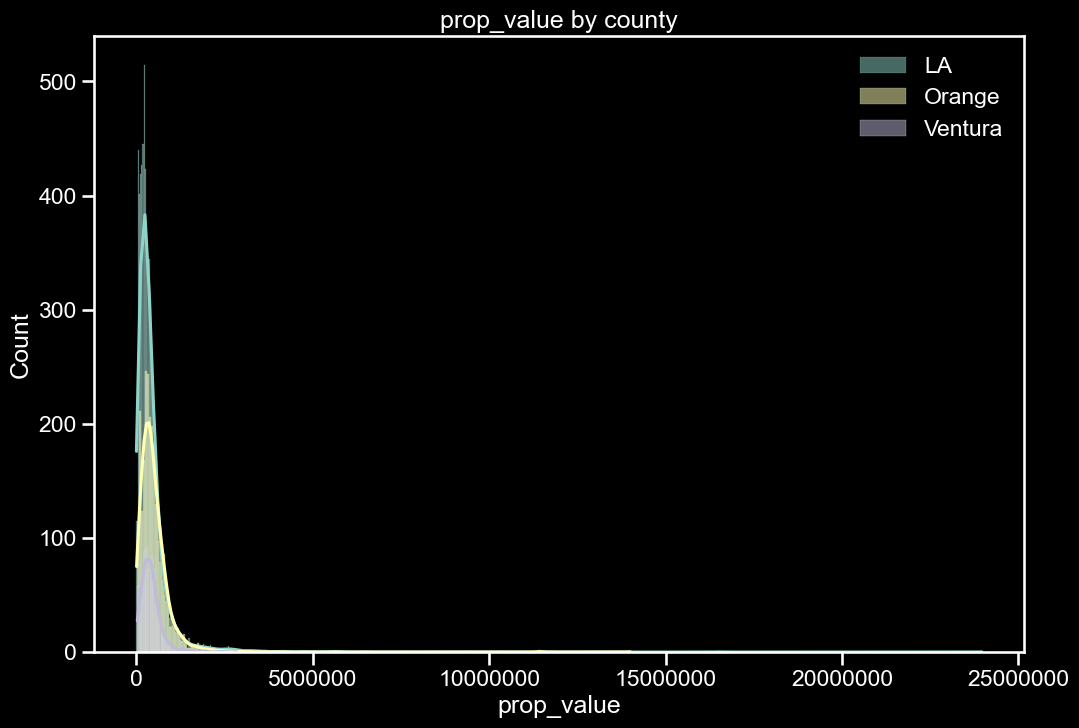

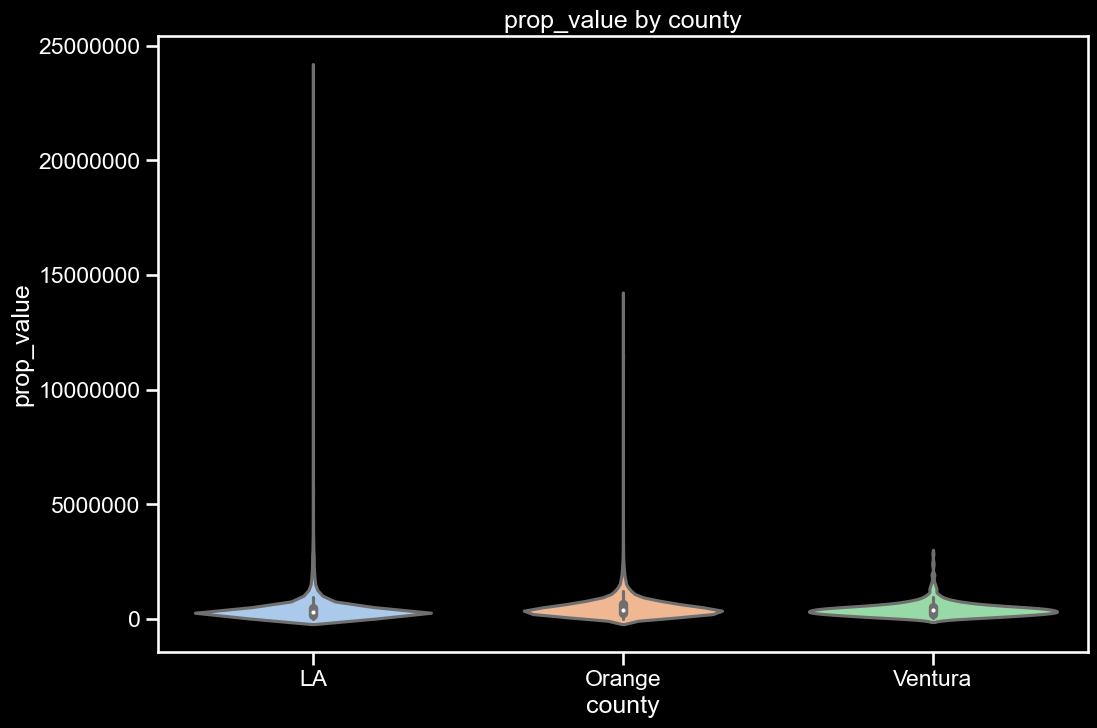

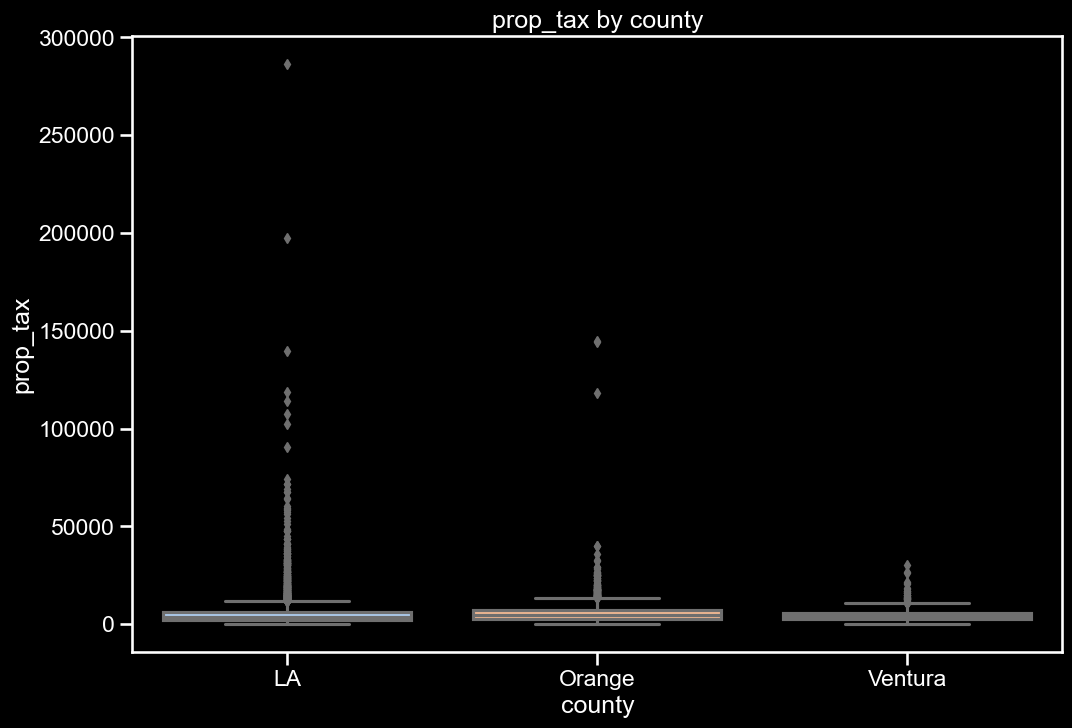

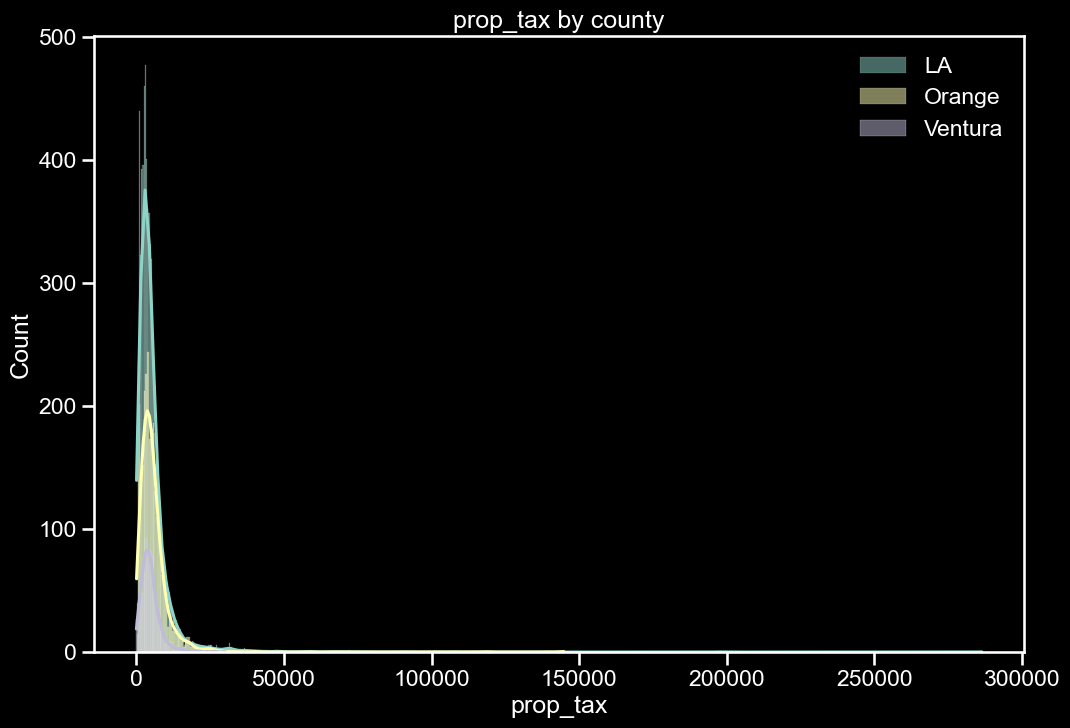

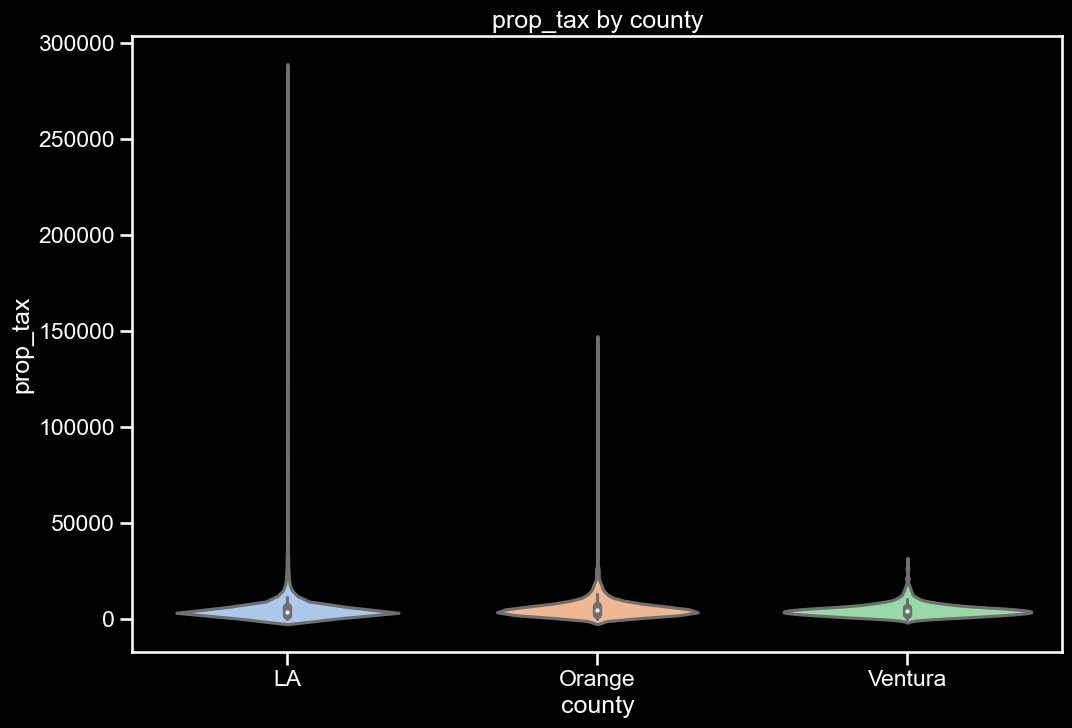

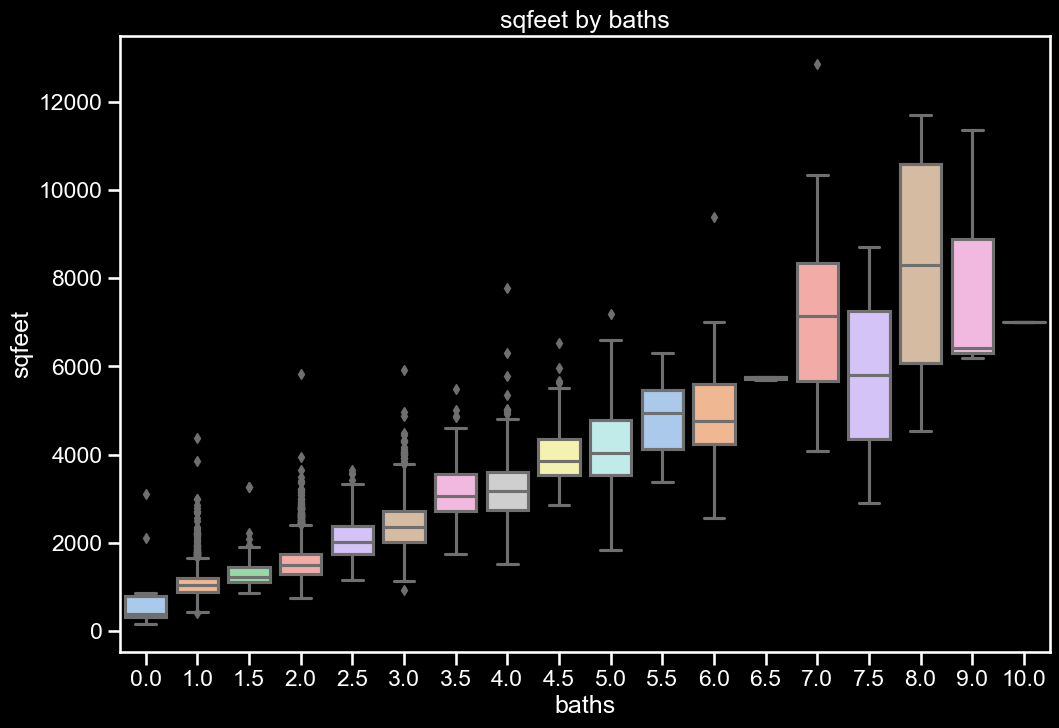

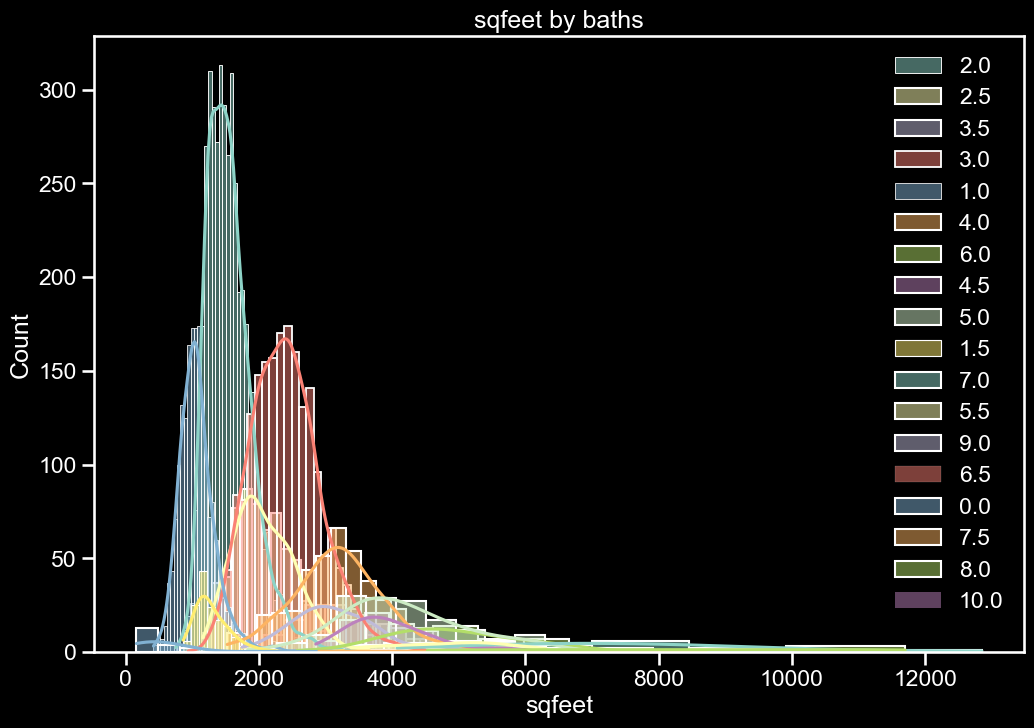

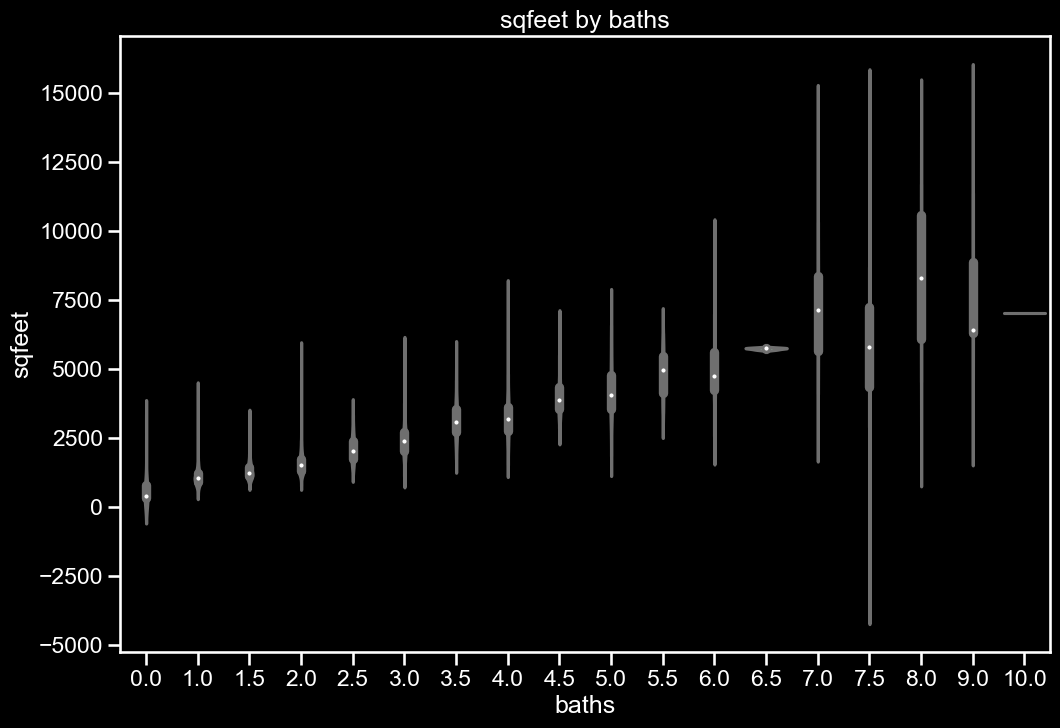

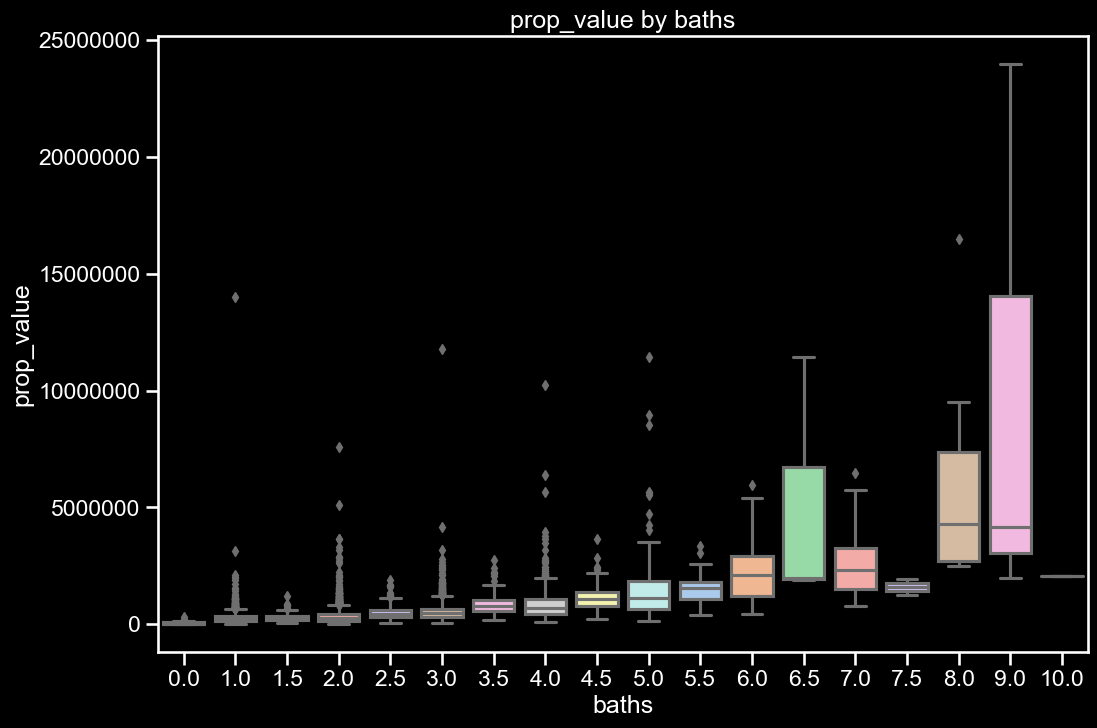

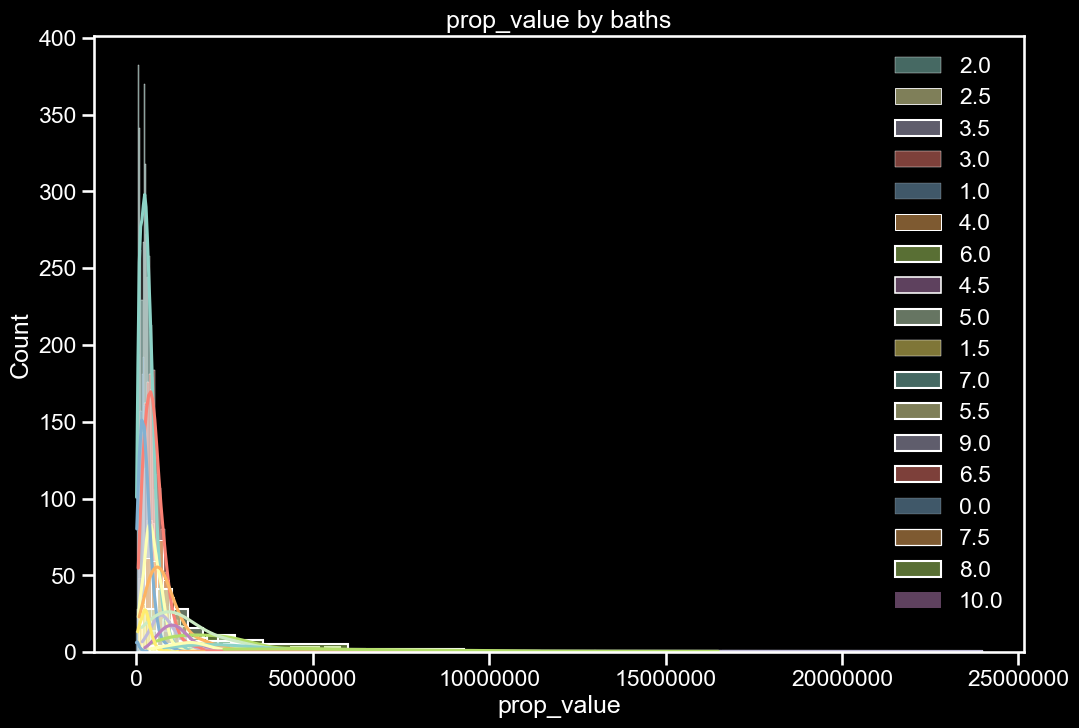

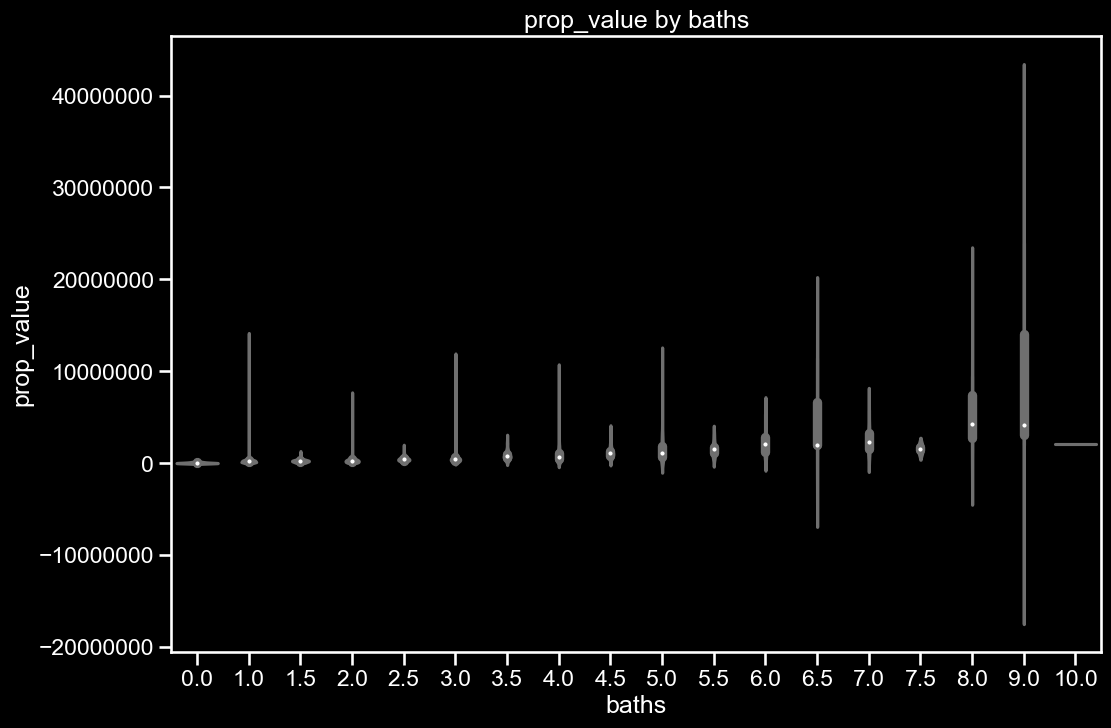

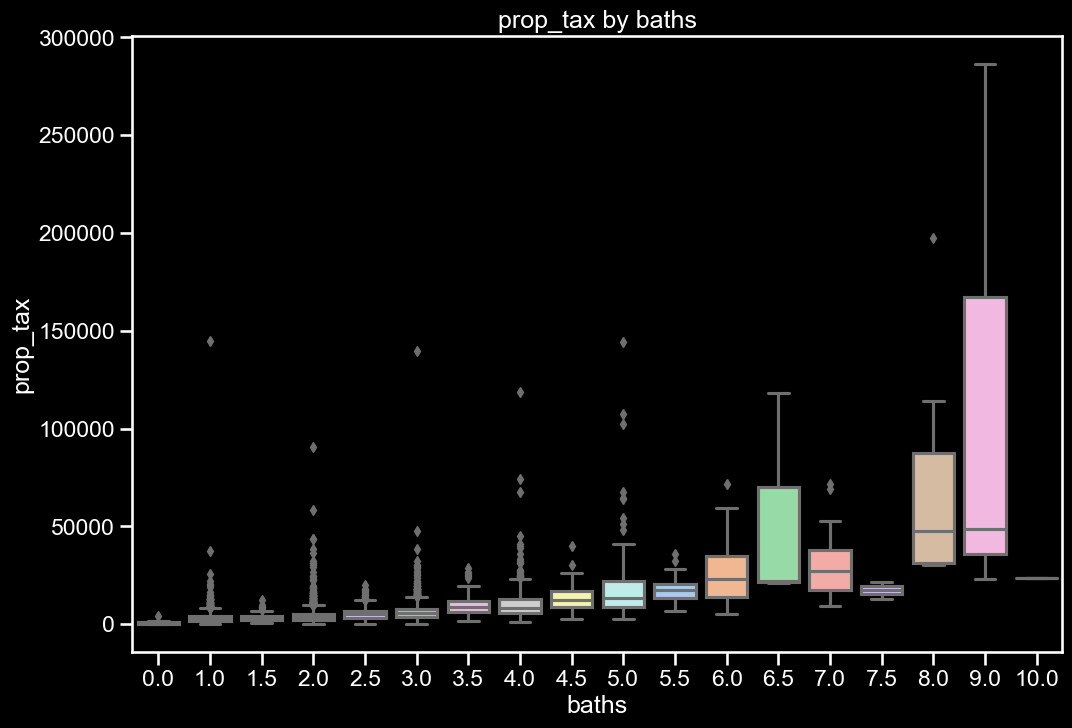

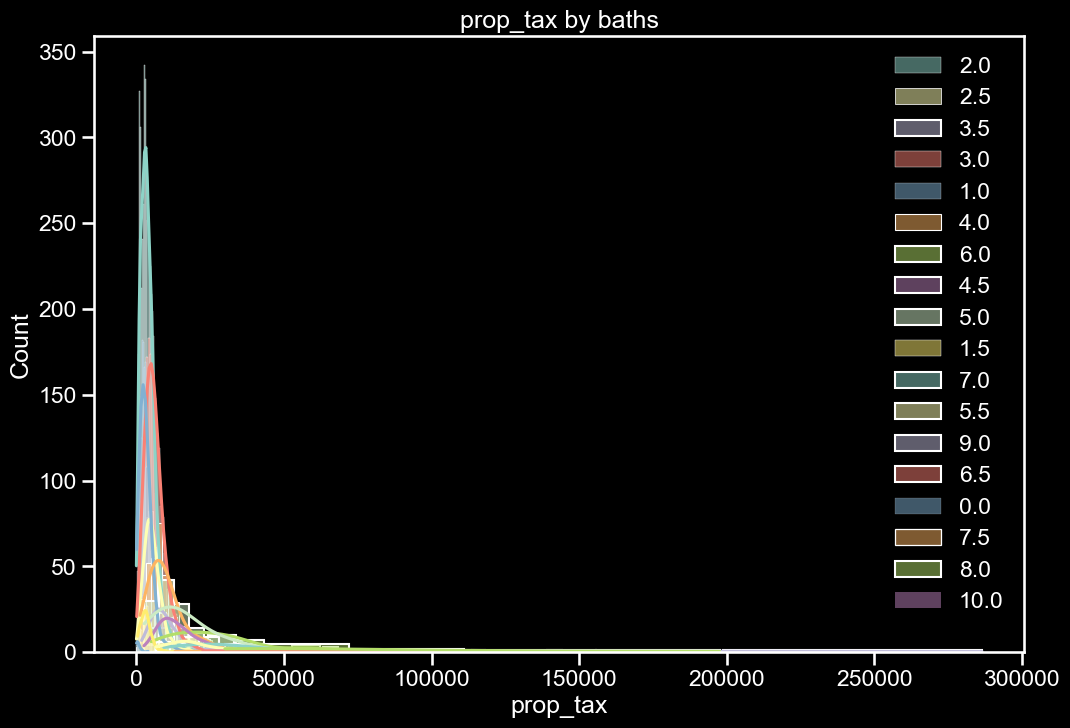

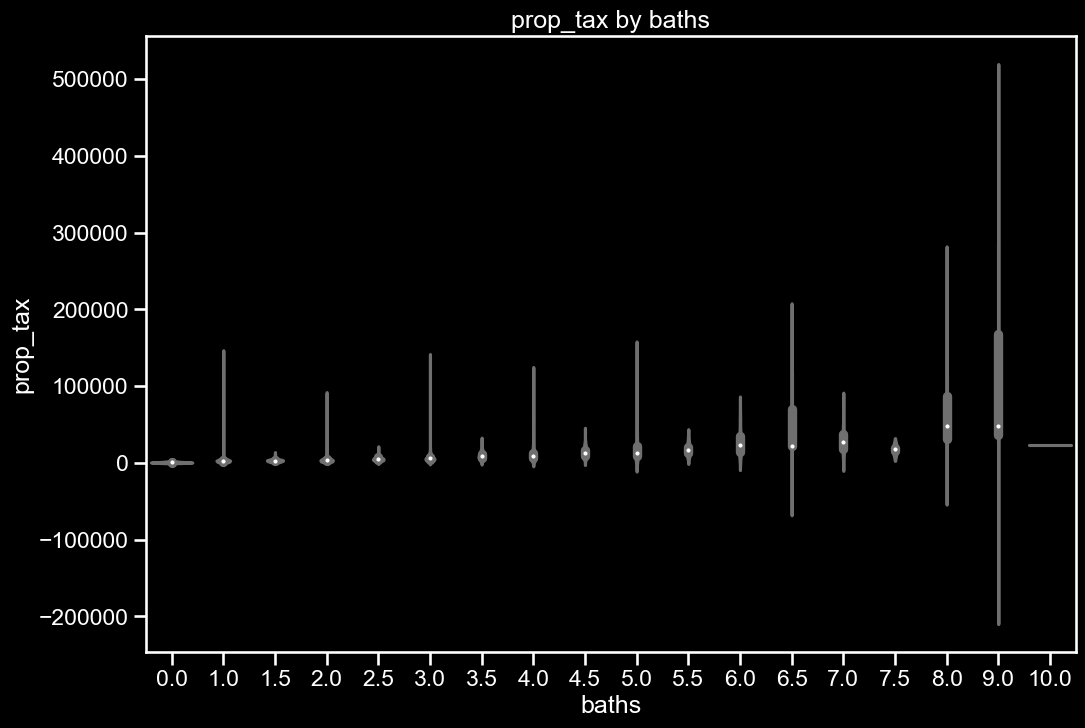

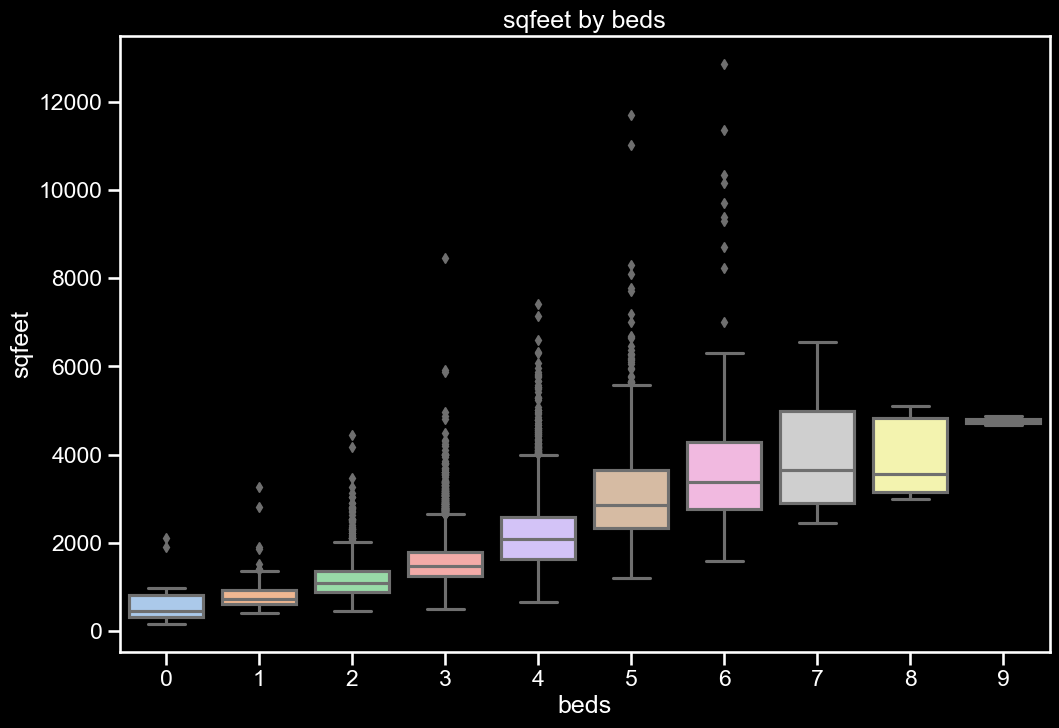

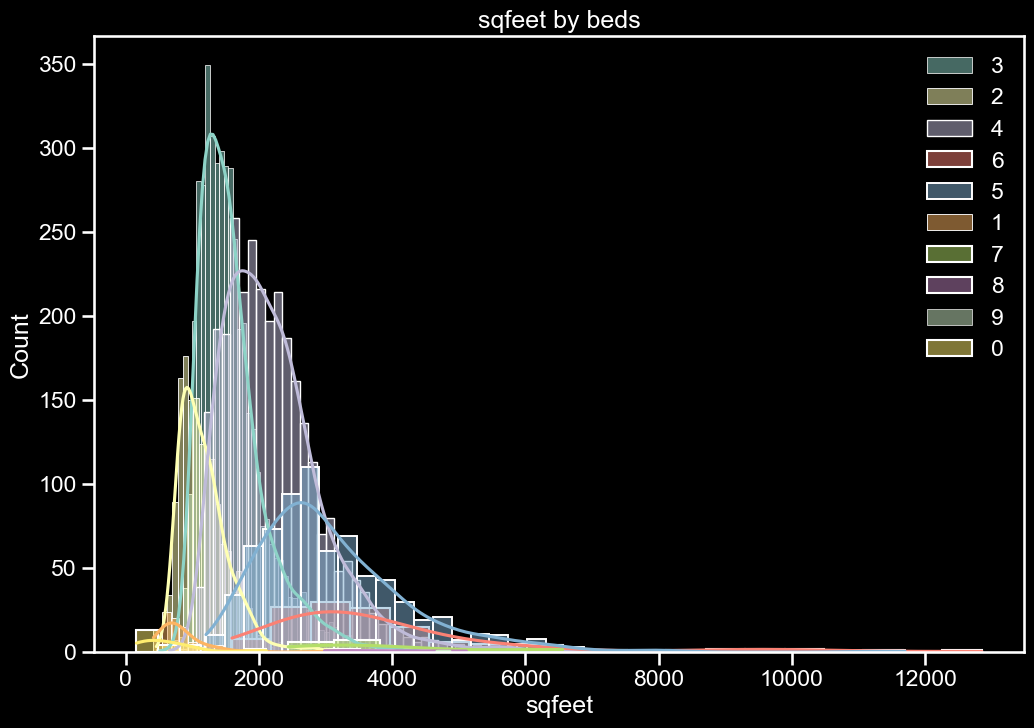

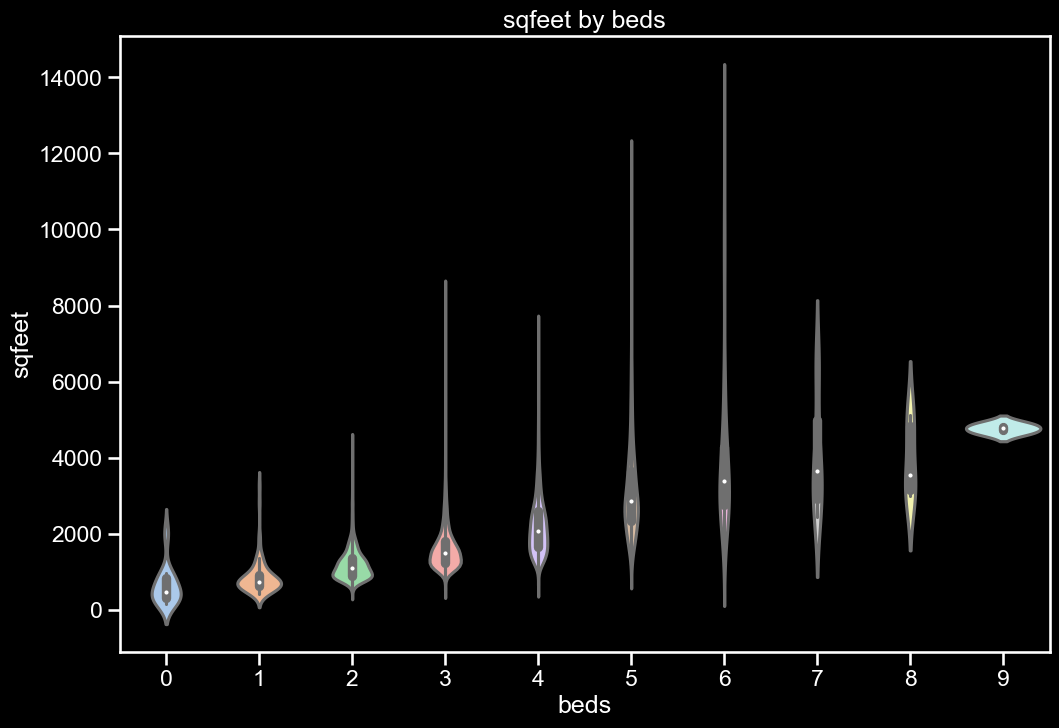

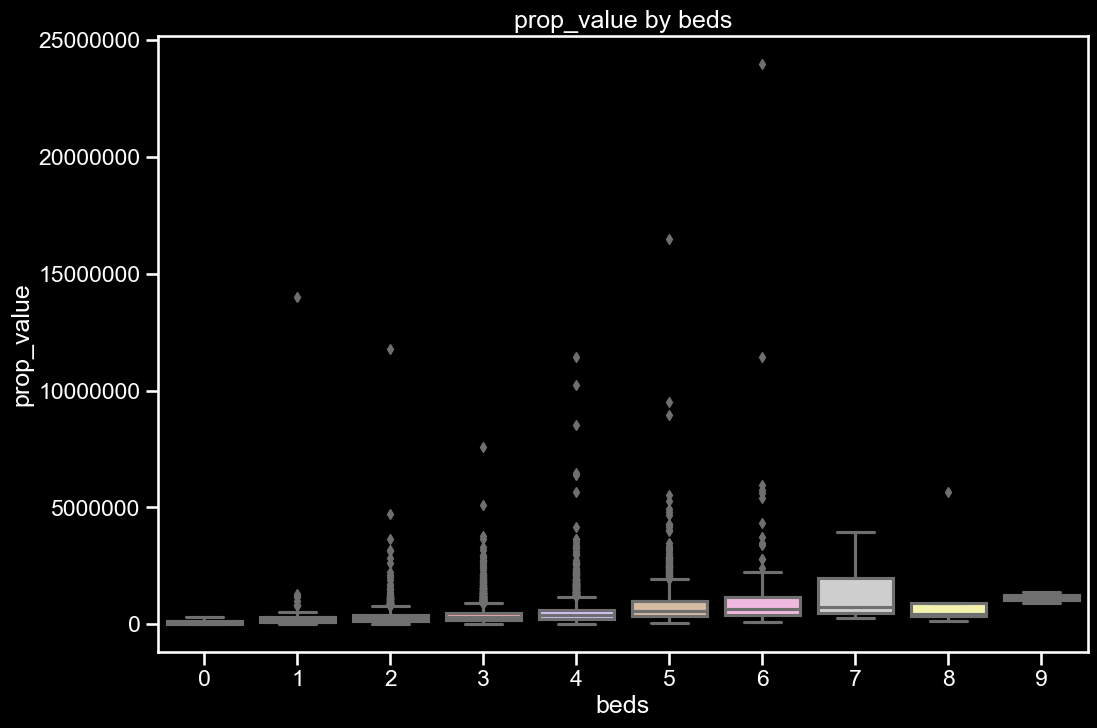

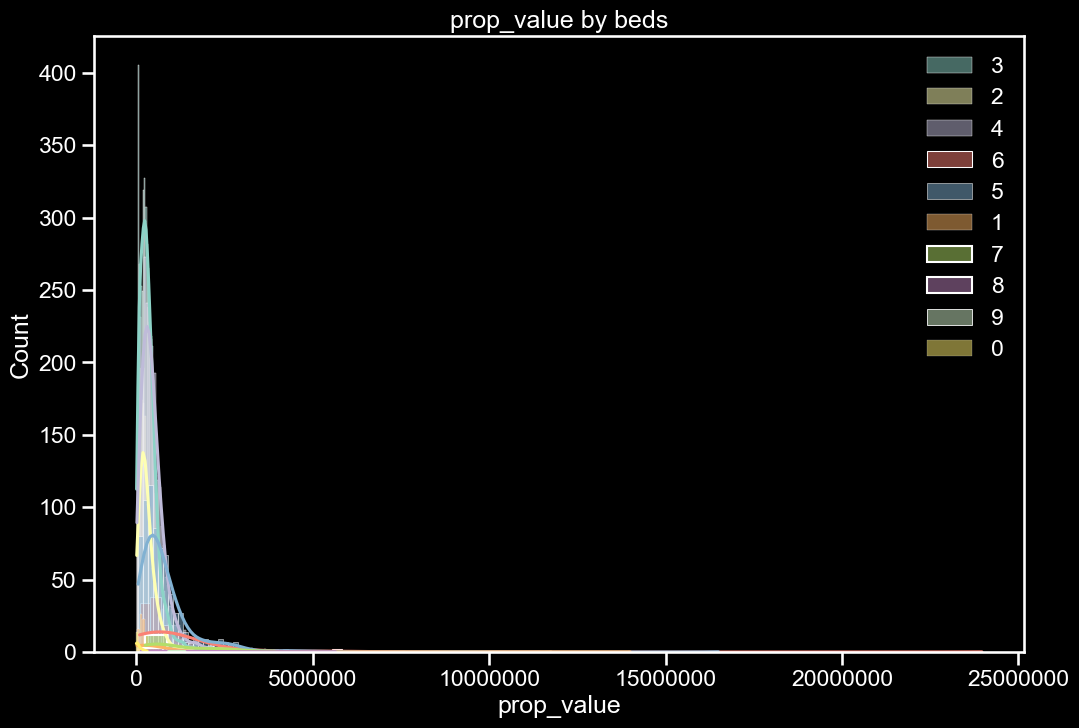

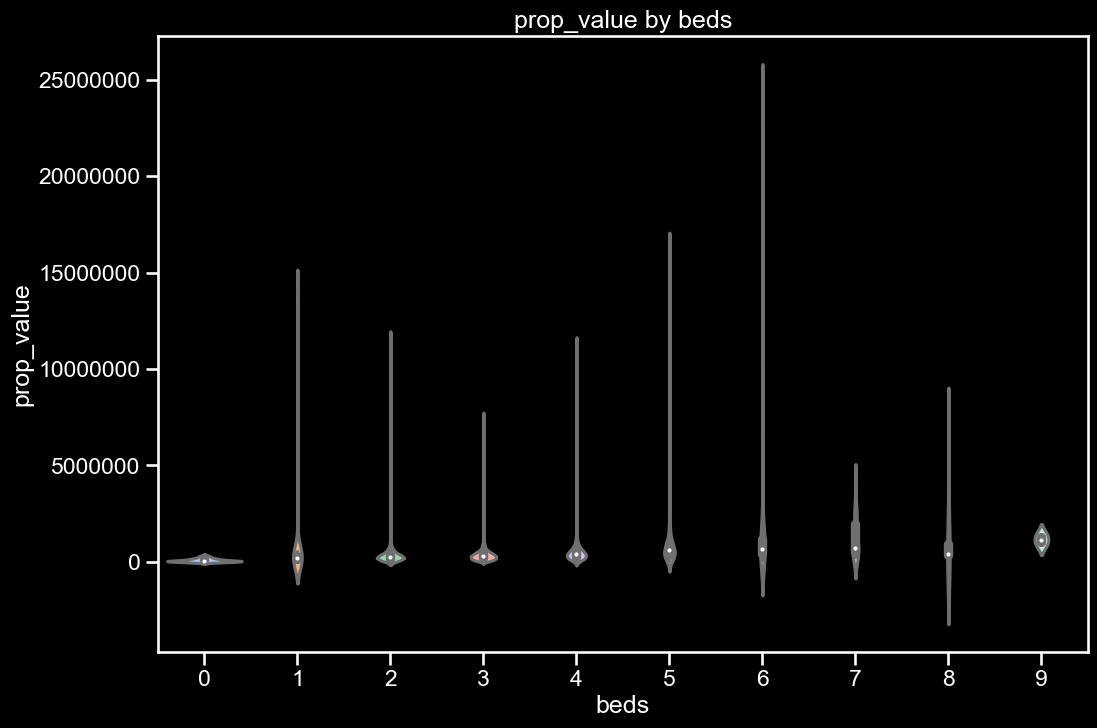

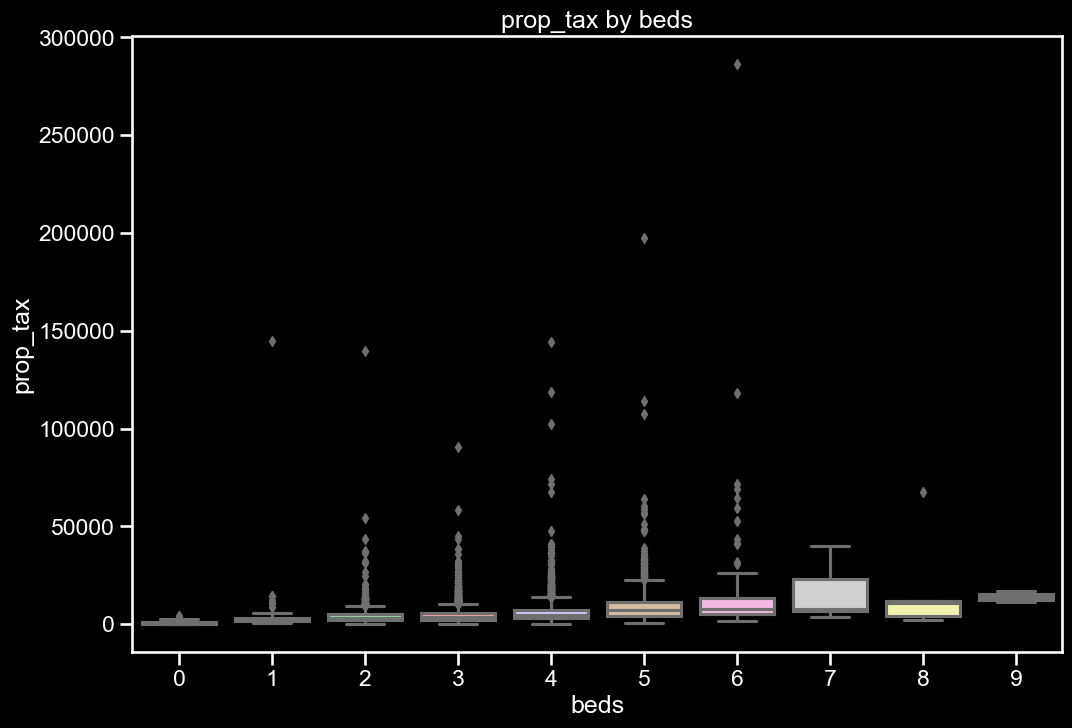

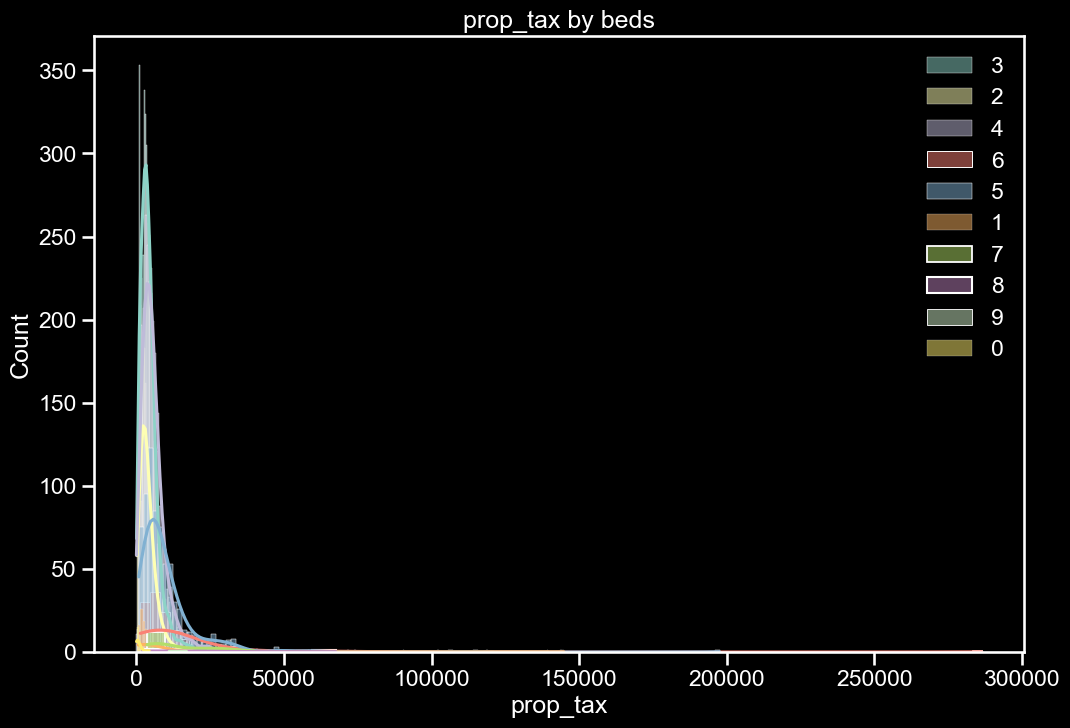

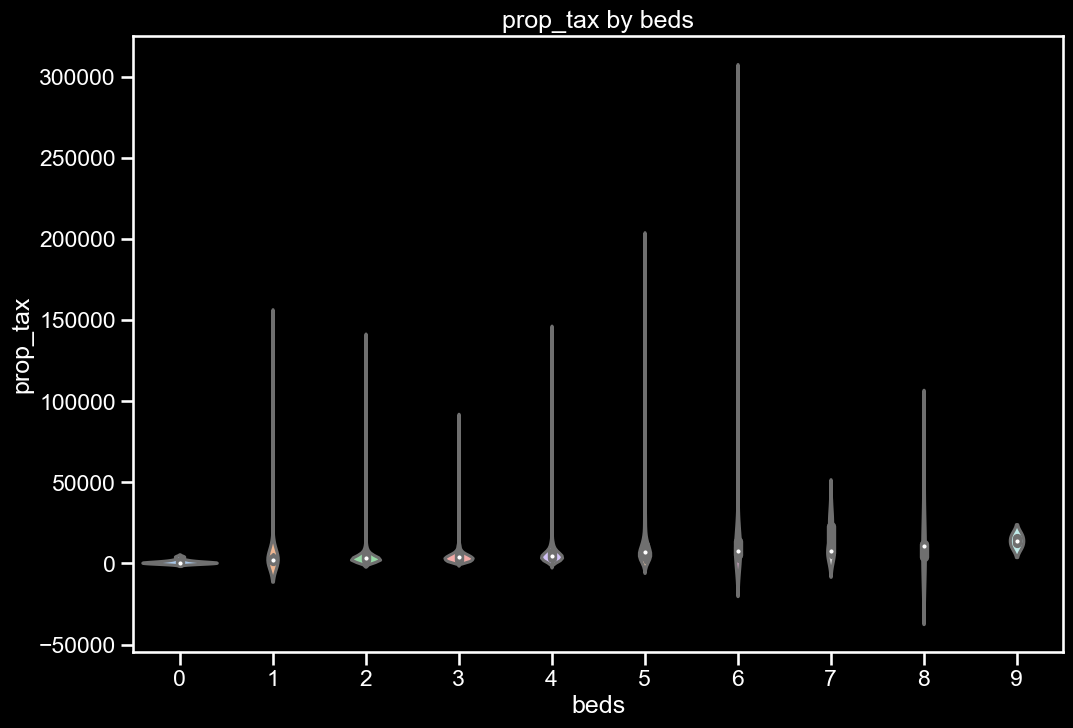

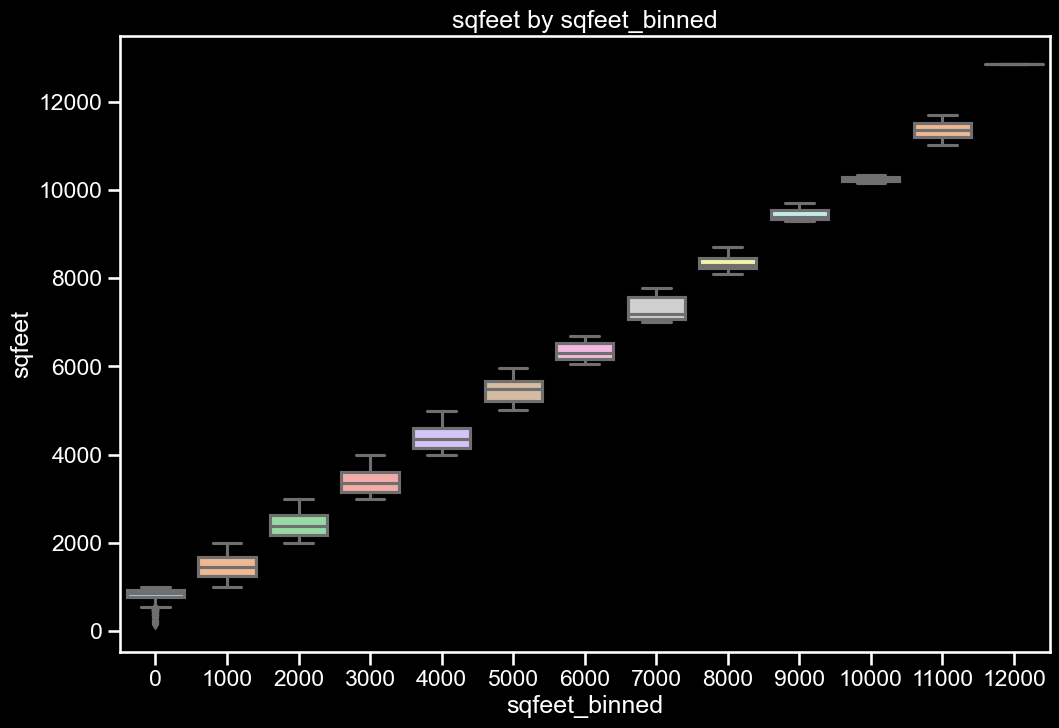

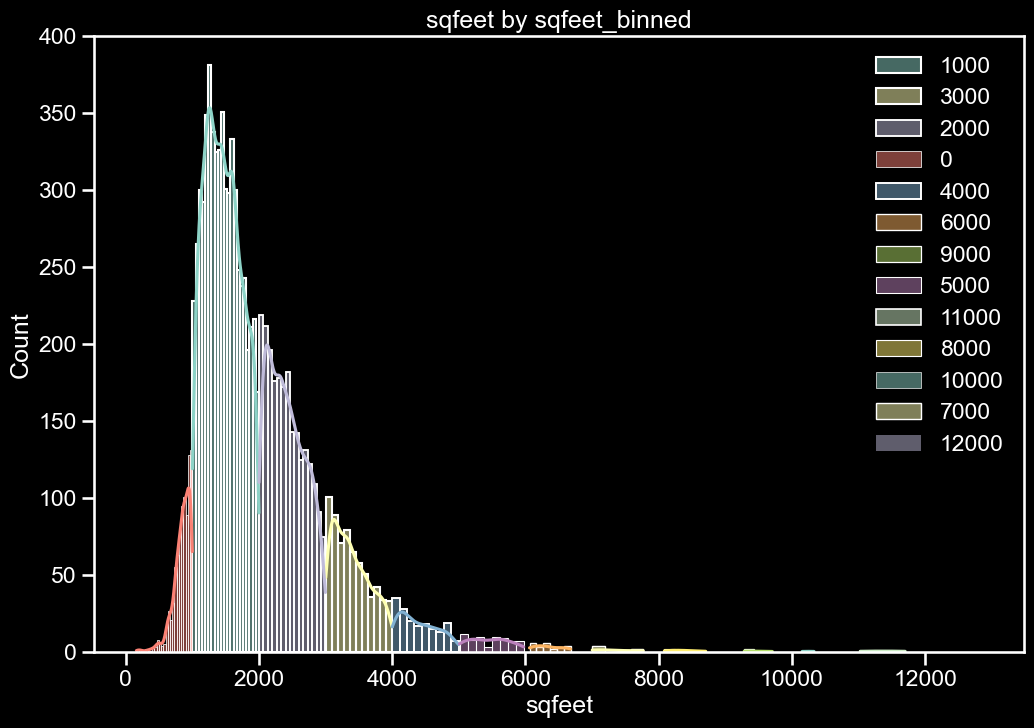

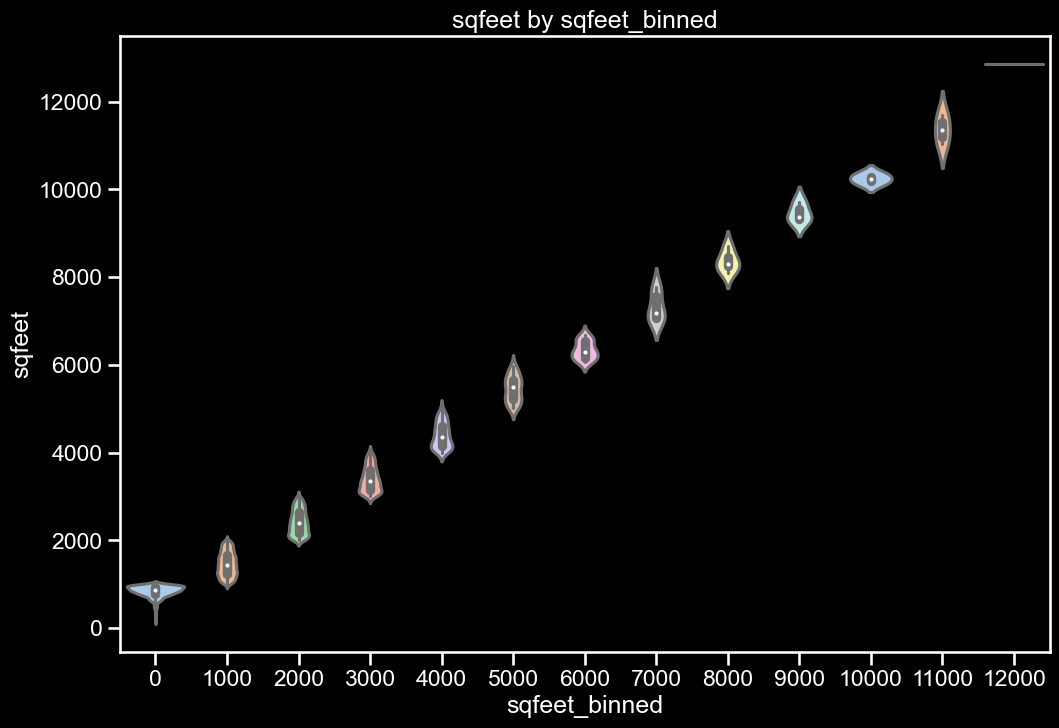

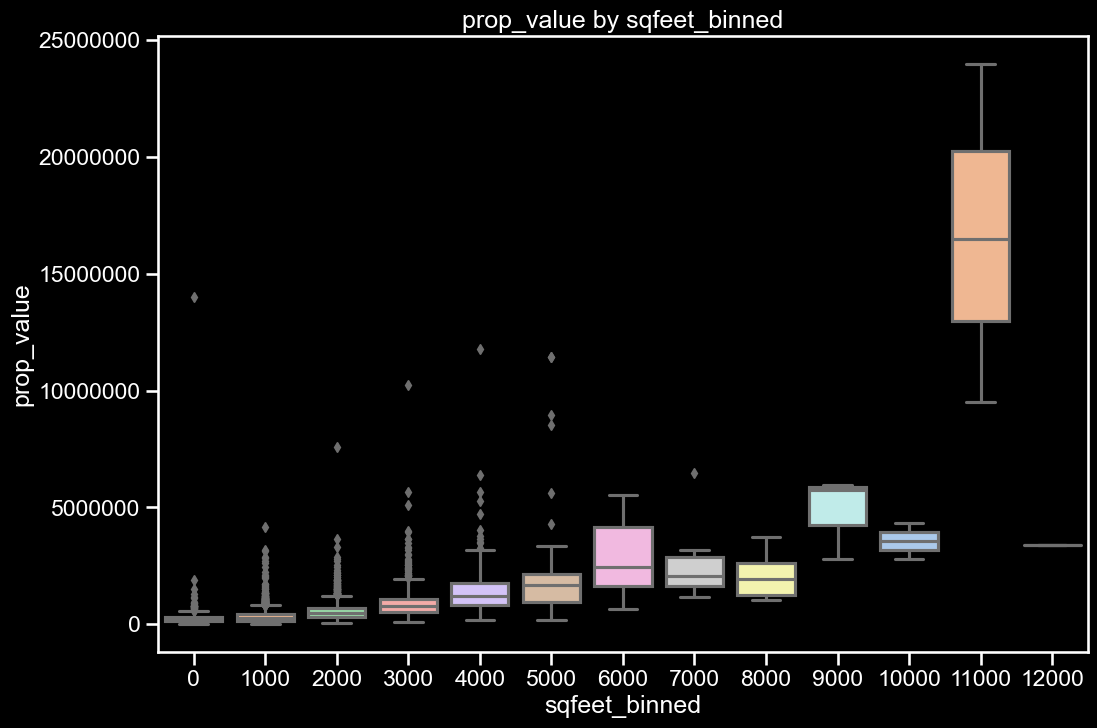

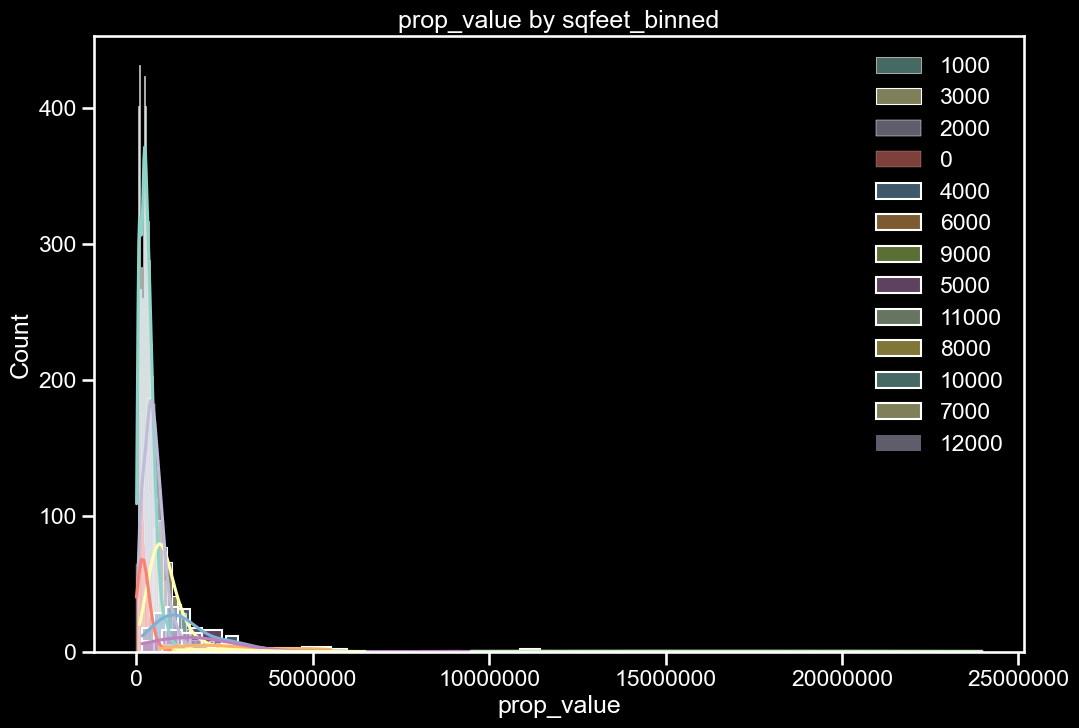

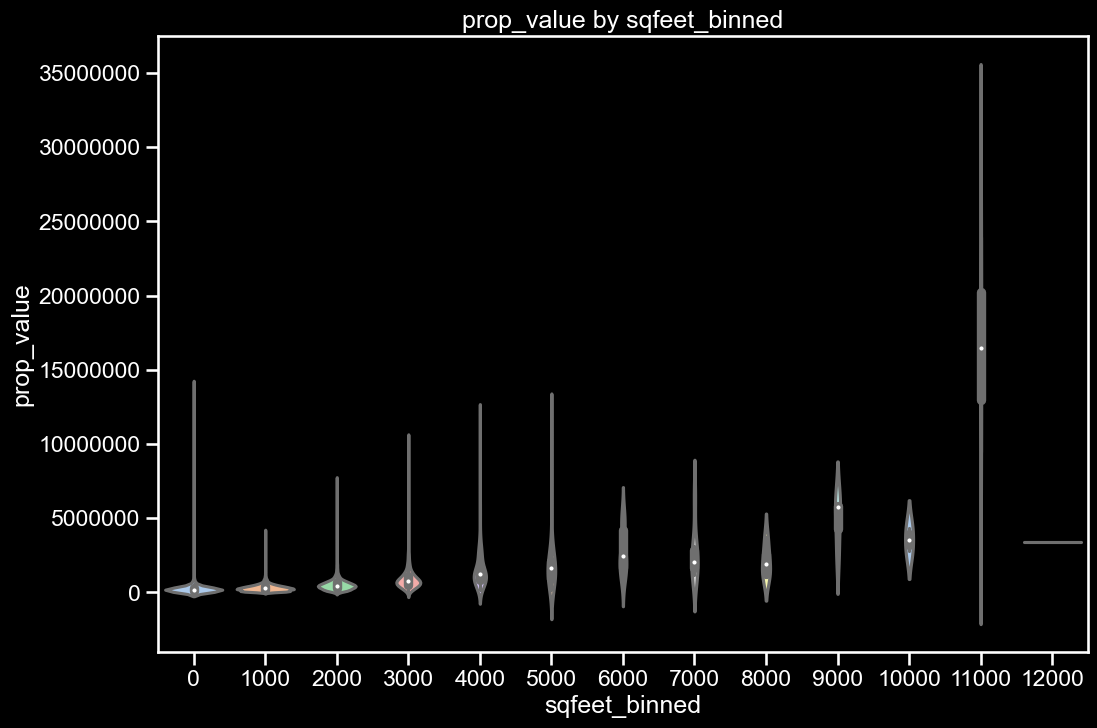

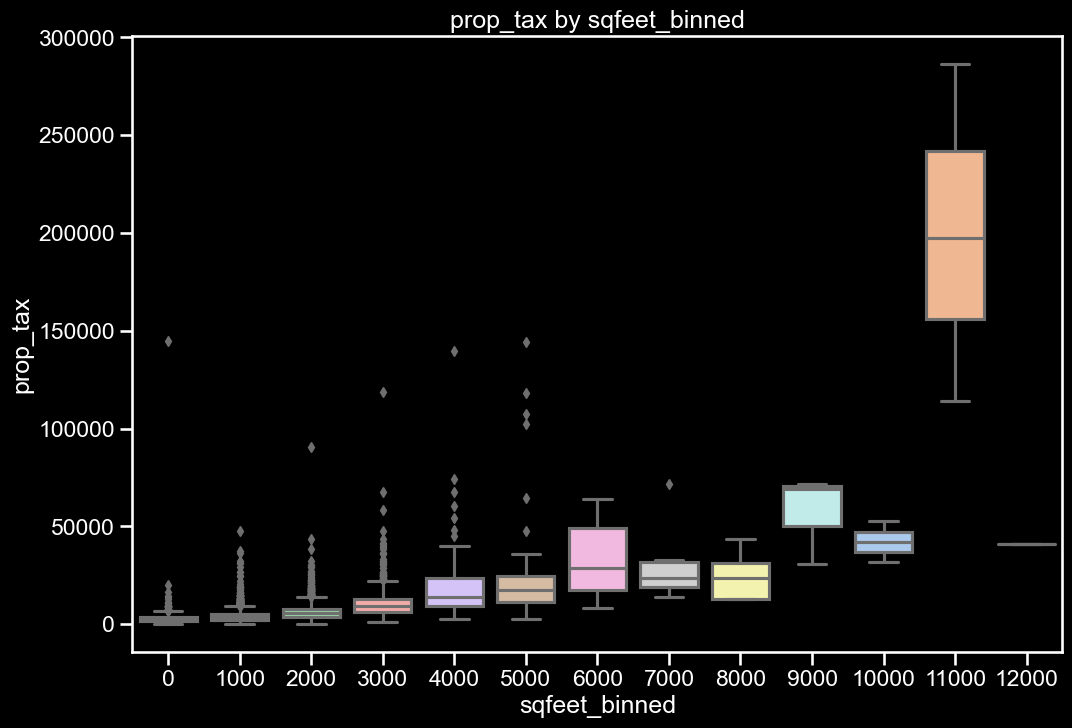

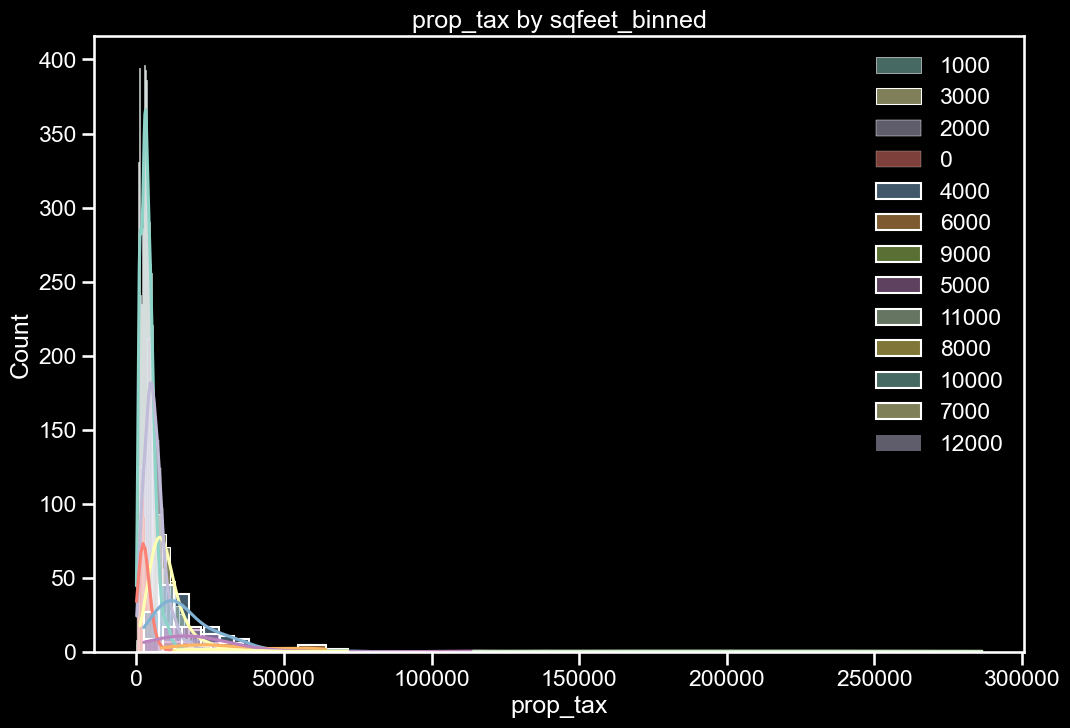

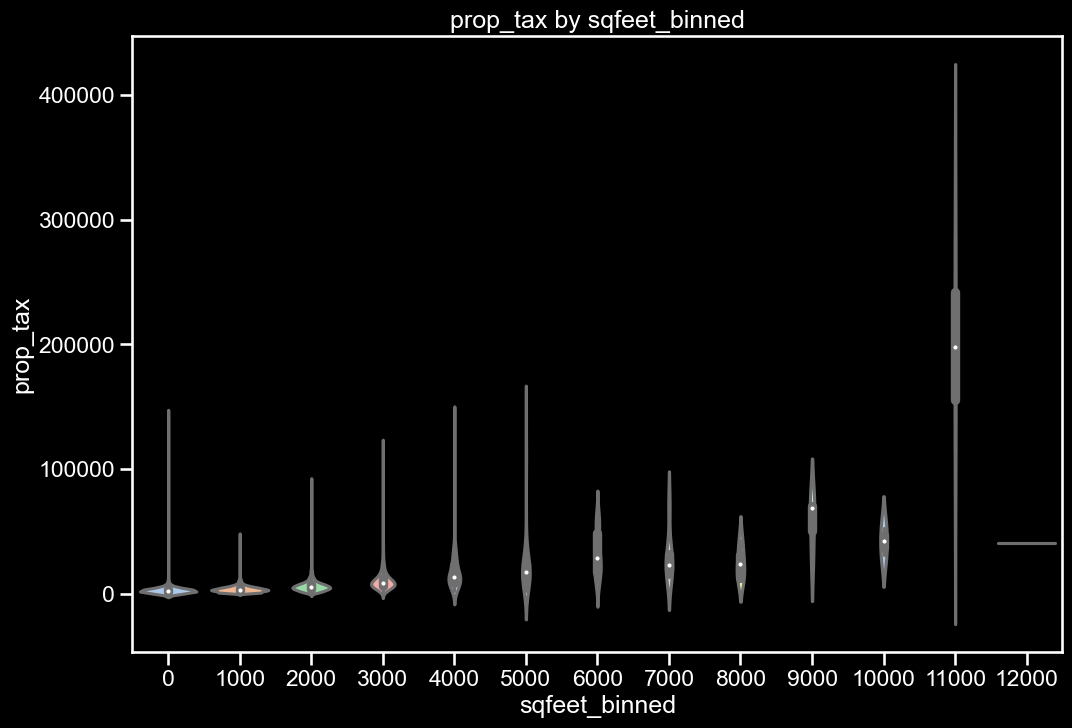

In [15]:
# Separate categories

cont = ["sqfeet", "prop_value", "prop_tax"]
cat = ["decade", "county", "baths", "beds", "sqfeet_binned"]

plot_categorical_and_continuous_vars(sm_df, cat, cont)

### 5. 

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

### 6. 

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### 7. 

Come up with some initial hypotheses based on your goal of predicting property value.

- Newer homes in `decade` have higher `sqfeet`

- There is not significant difference in `prop_value` based on `decade`

- The median `prop_value` is not significantly different between `county`

- Having more `baths` increases the `prop_value`

- Having more `beds` does not significantly increase the `prop_value`

- Having more `sqfeet_binned` increases `prop_value`

### 8. 

Visualize all combinations of variables in some way.



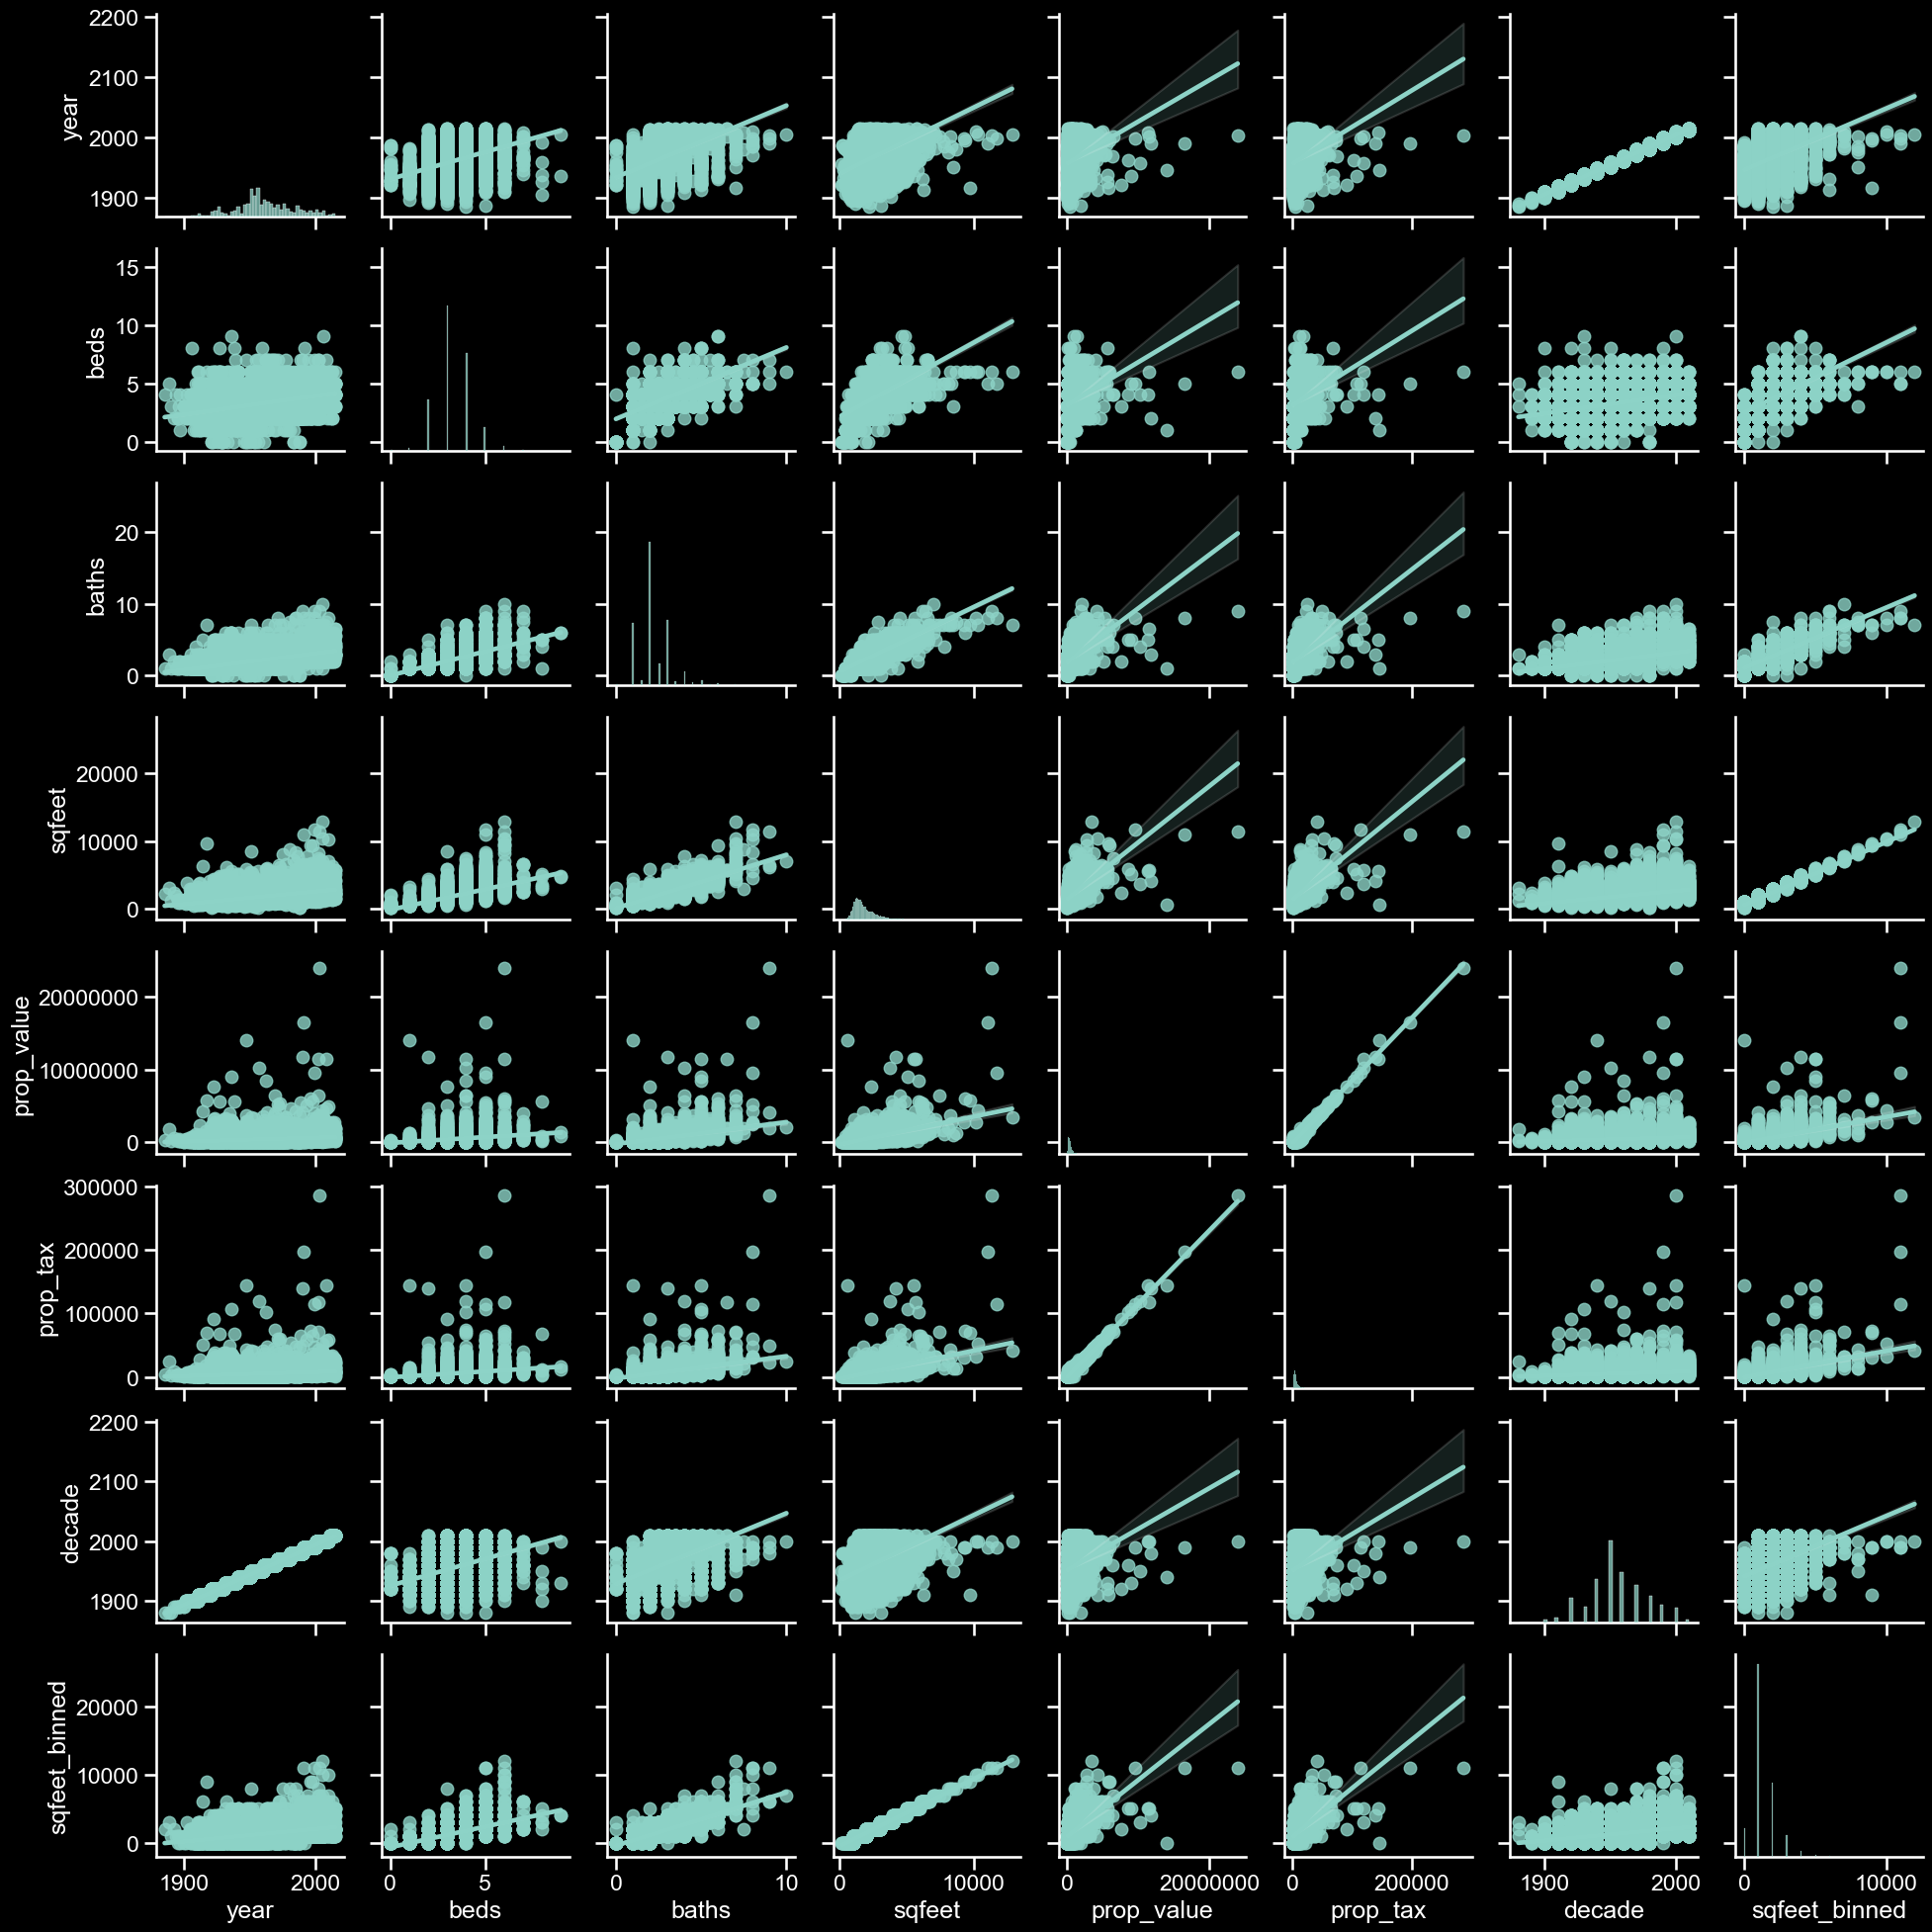

In [16]:
sns.pairplot(data=sm_df.sample(1000), kind="reg")
plt.show()

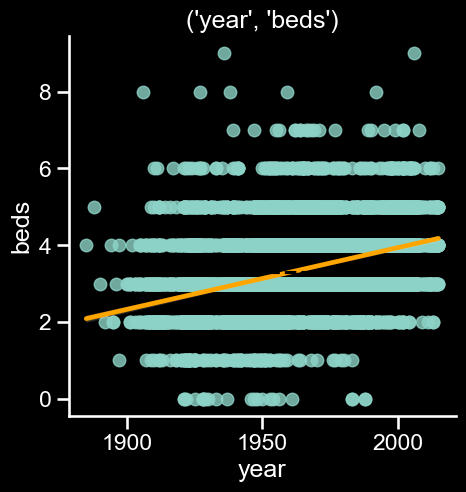

<Figure size 1200x800 with 0 Axes>

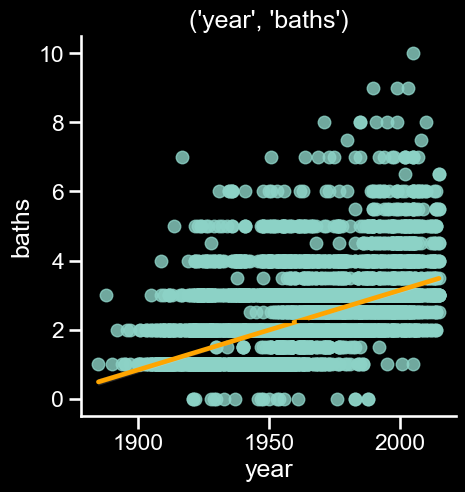

<Figure size 1200x800 with 0 Axes>

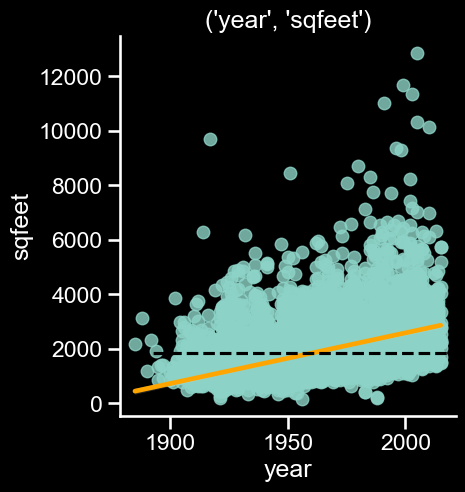

<Figure size 1200x800 with 0 Axes>

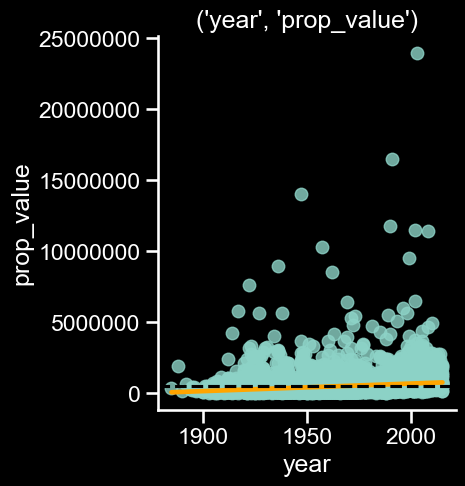

<Figure size 1200x800 with 0 Axes>

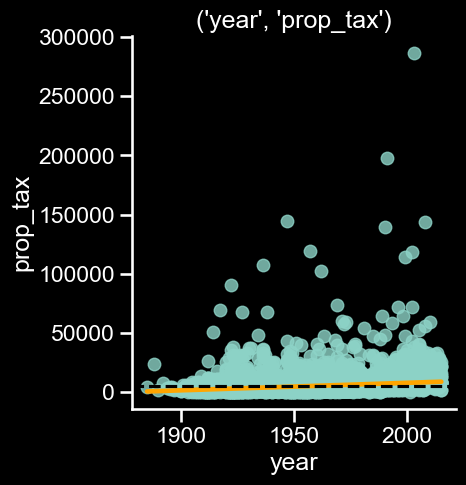

<Figure size 1200x800 with 0 Axes>

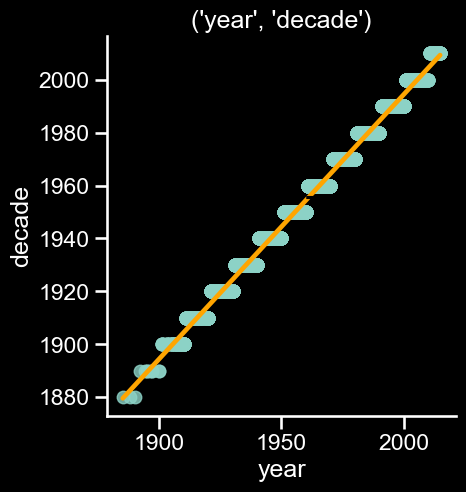

<Figure size 1200x800 with 0 Axes>

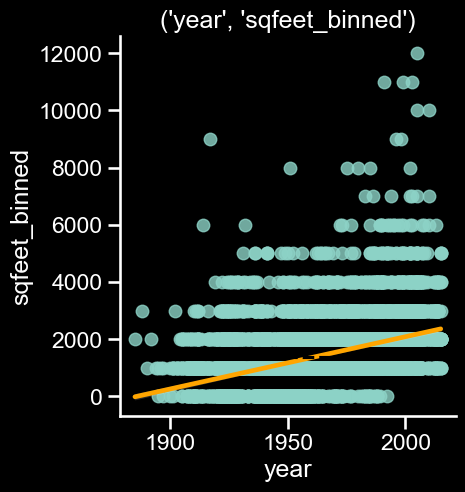

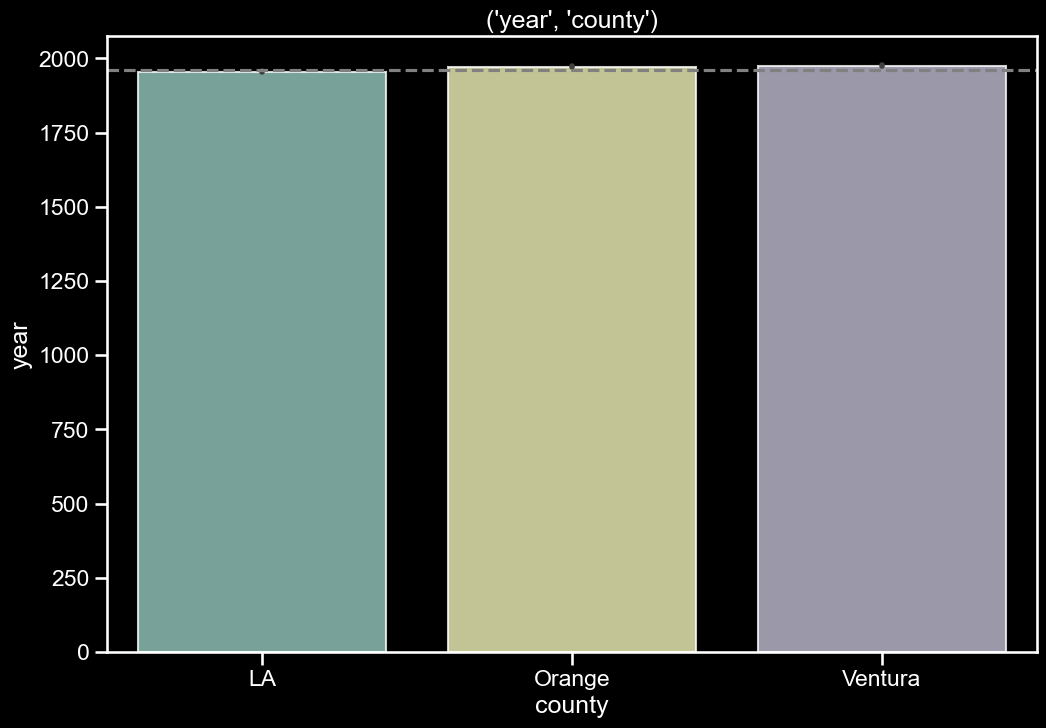

<Figure size 1200x800 with 0 Axes>

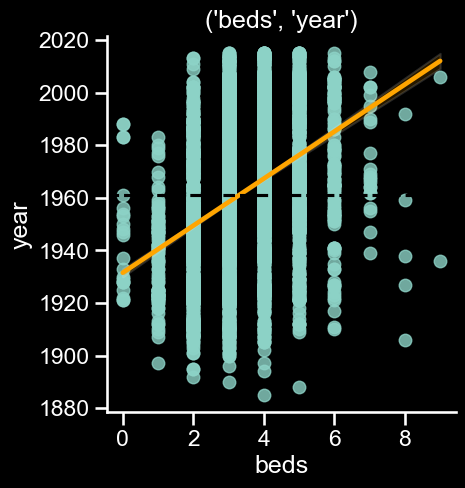

<Figure size 1200x800 with 0 Axes>

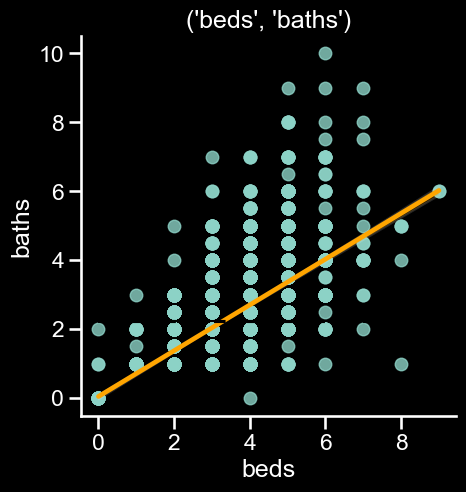

<Figure size 1200x800 with 0 Axes>

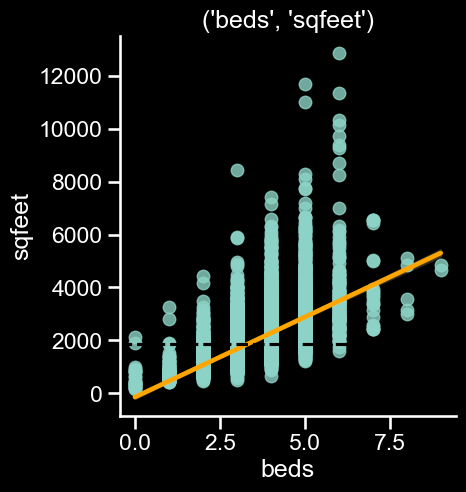

<Figure size 1200x800 with 0 Axes>

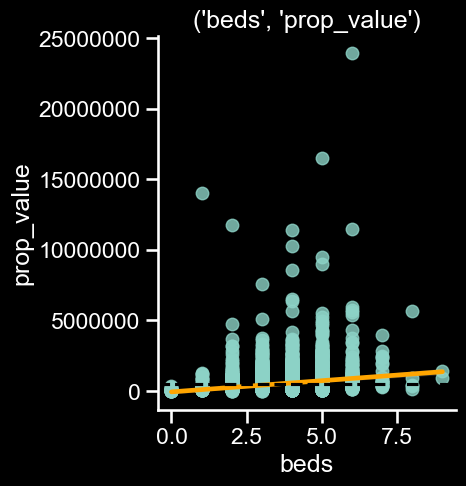

<Figure size 1200x800 with 0 Axes>

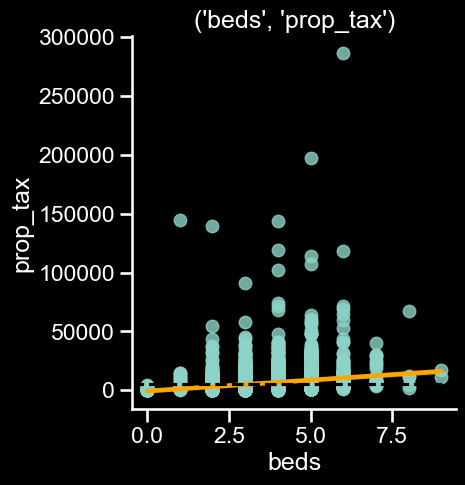

<Figure size 1200x800 with 0 Axes>

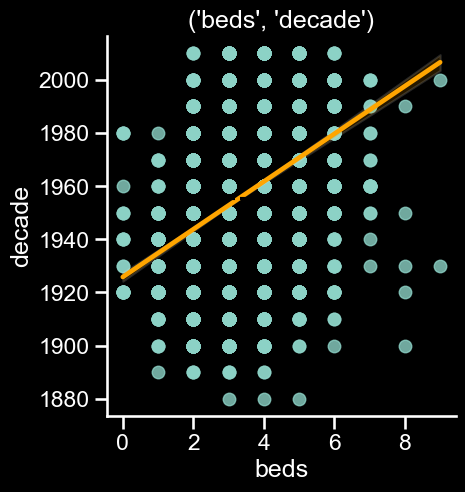

<Figure size 1200x800 with 0 Axes>

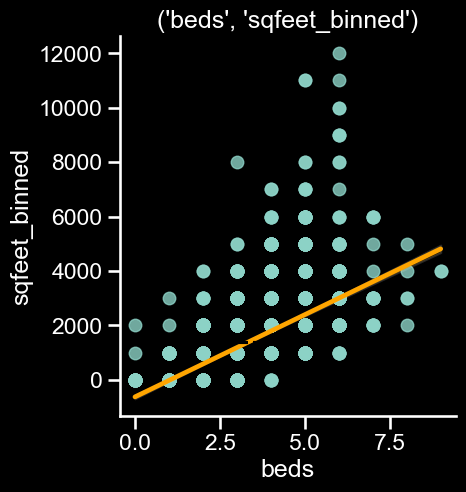

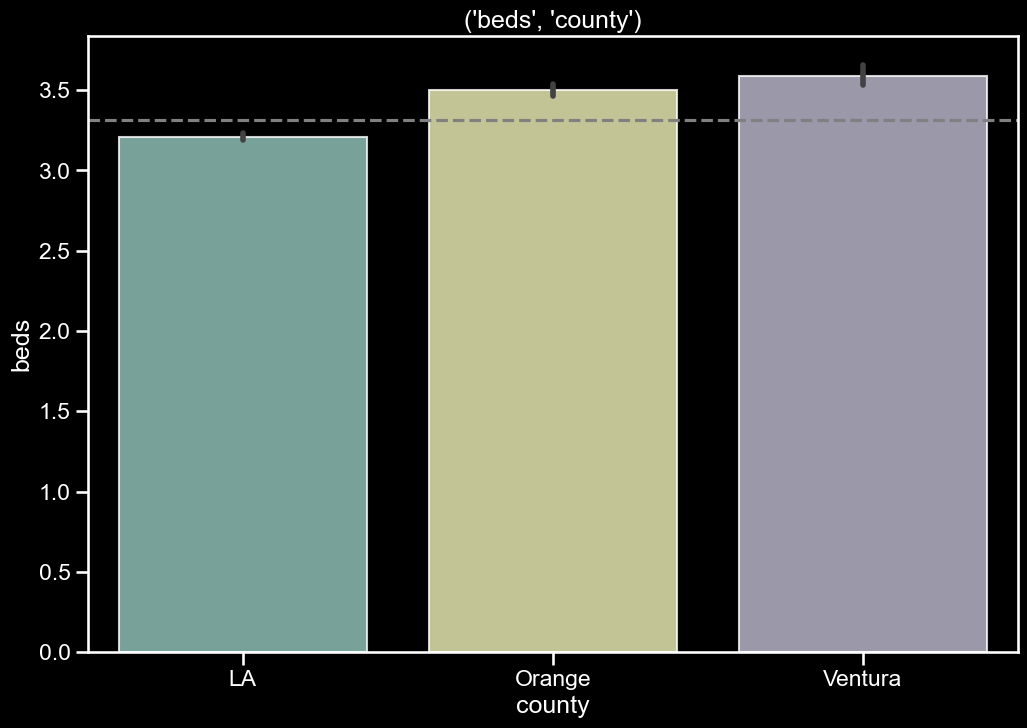

<Figure size 1200x800 with 0 Axes>

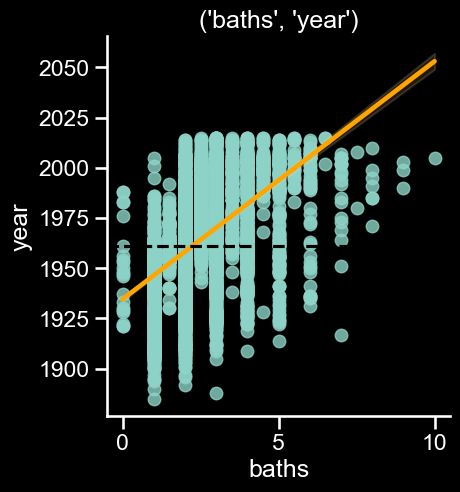

<Figure size 1200x800 with 0 Axes>

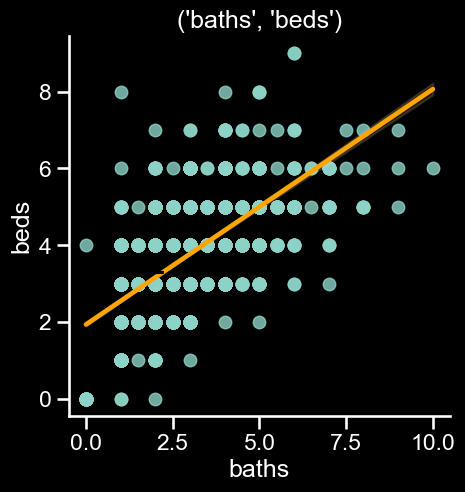

<Figure size 1200x800 with 0 Axes>

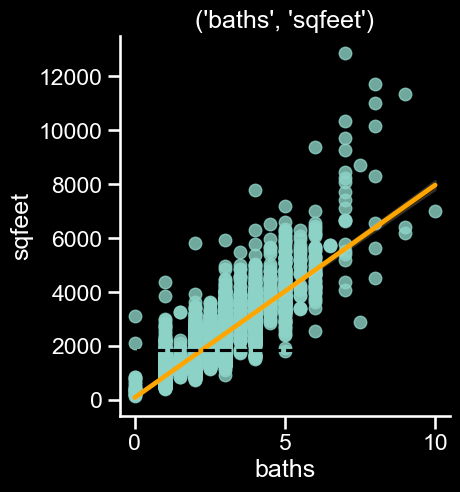

<Figure size 1200x800 with 0 Axes>

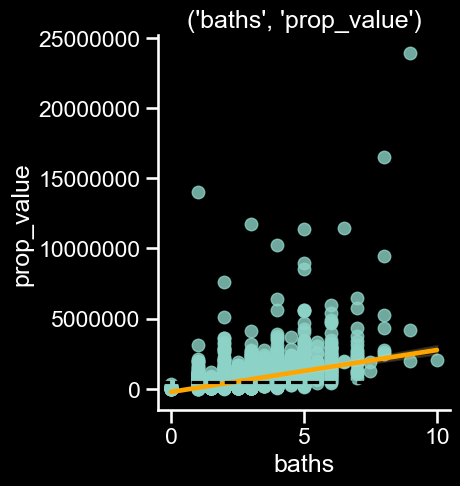

<Figure size 1200x800 with 0 Axes>

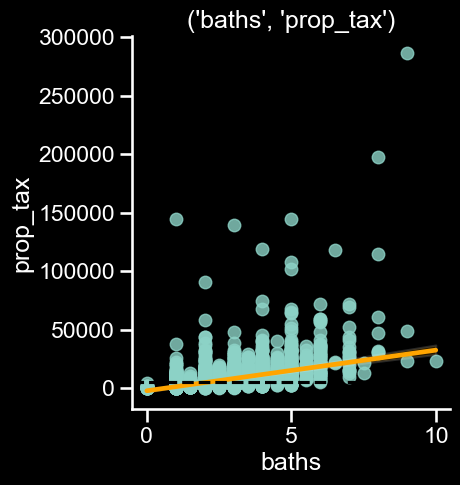

<Figure size 1200x800 with 0 Axes>

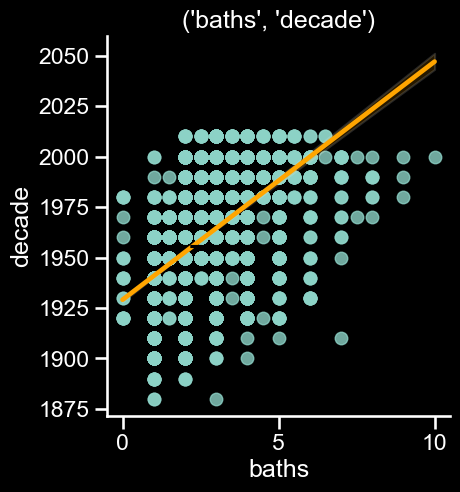

<Figure size 1200x800 with 0 Axes>

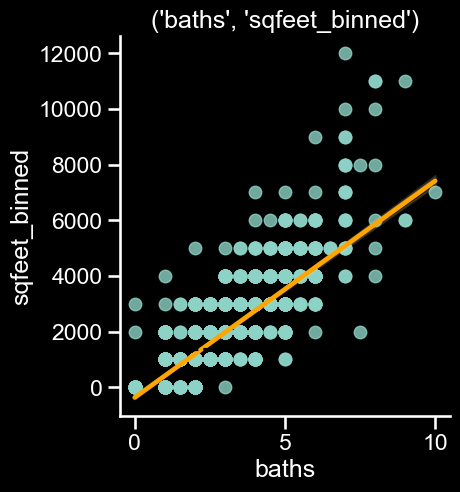

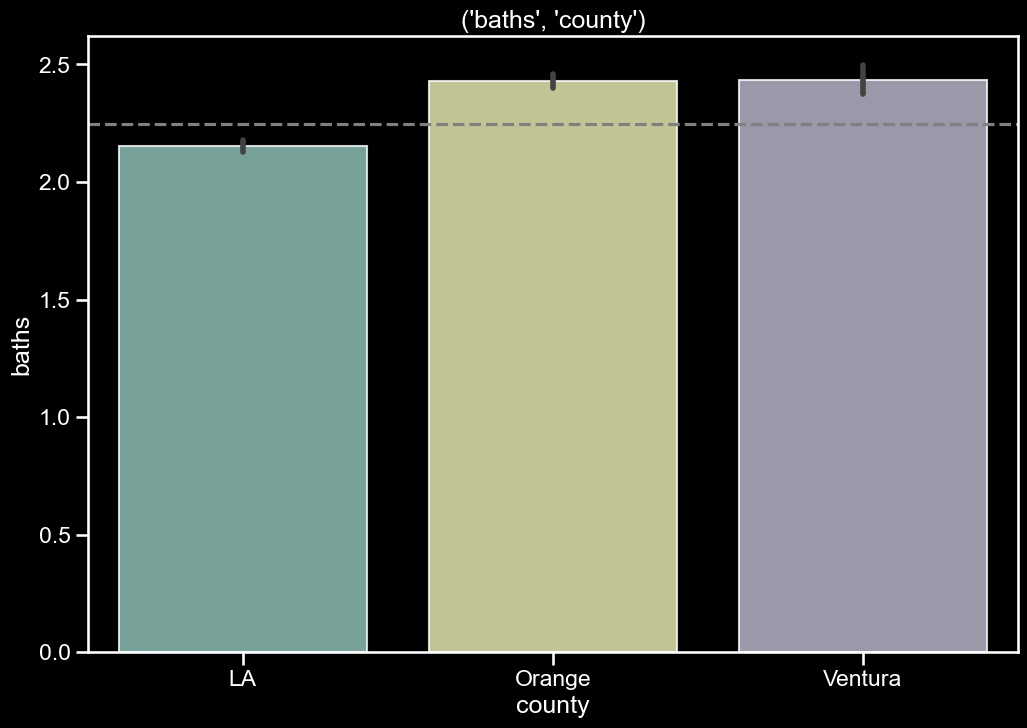

<Figure size 1200x800 with 0 Axes>

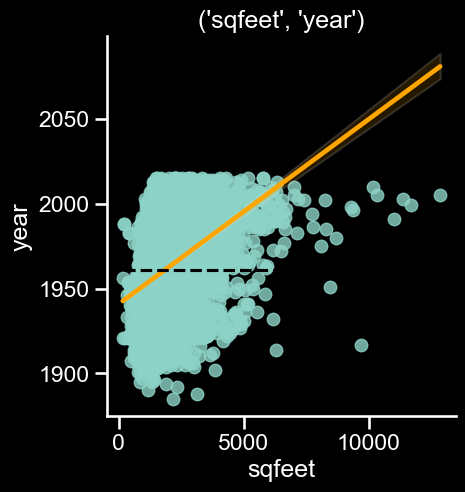

<Figure size 1200x800 with 0 Axes>

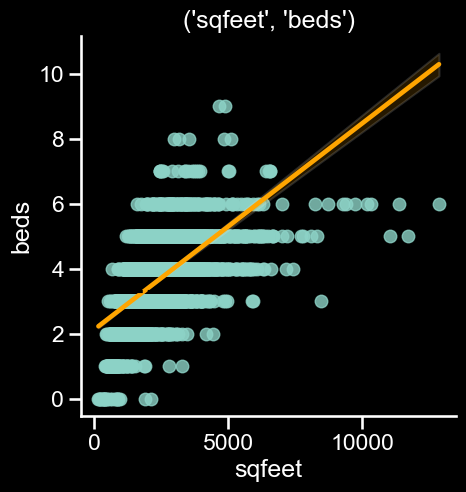

<Figure size 1200x800 with 0 Axes>

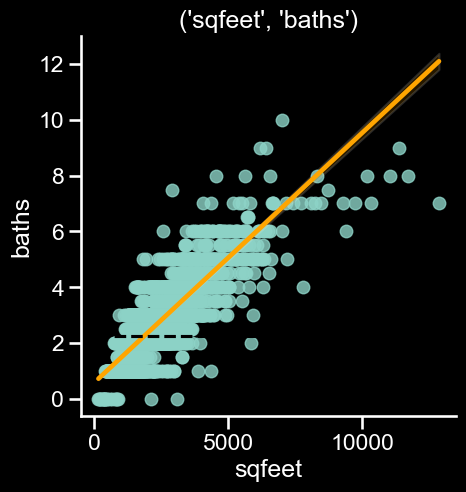

<Figure size 1200x800 with 0 Axes>

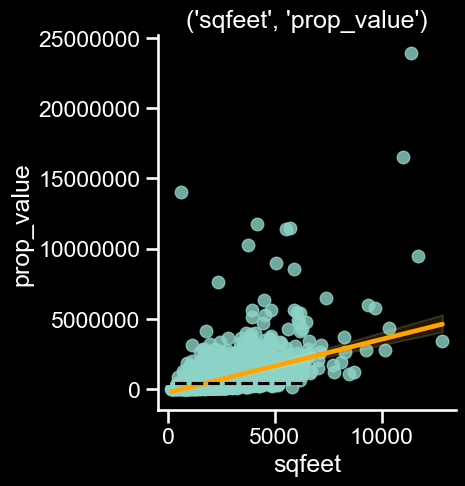

<Figure size 1200x800 with 0 Axes>

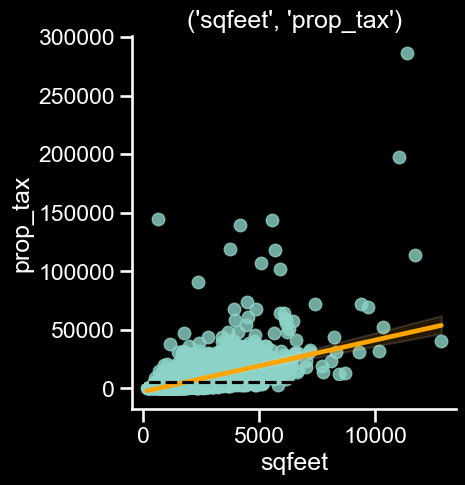

<Figure size 1200x800 with 0 Axes>

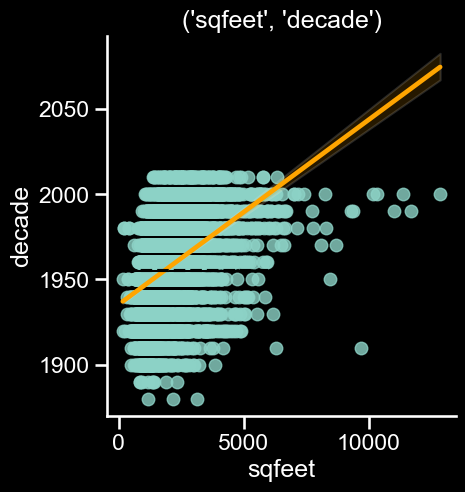

<Figure size 1200x800 with 0 Axes>

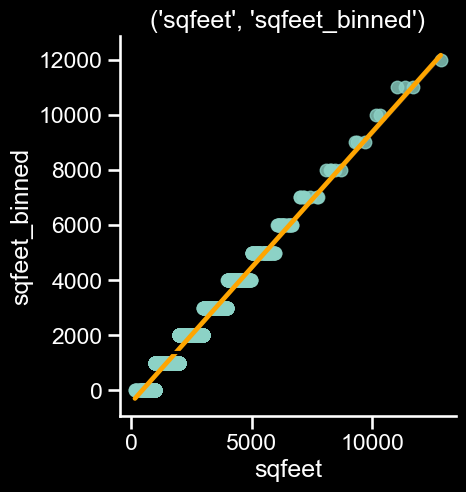

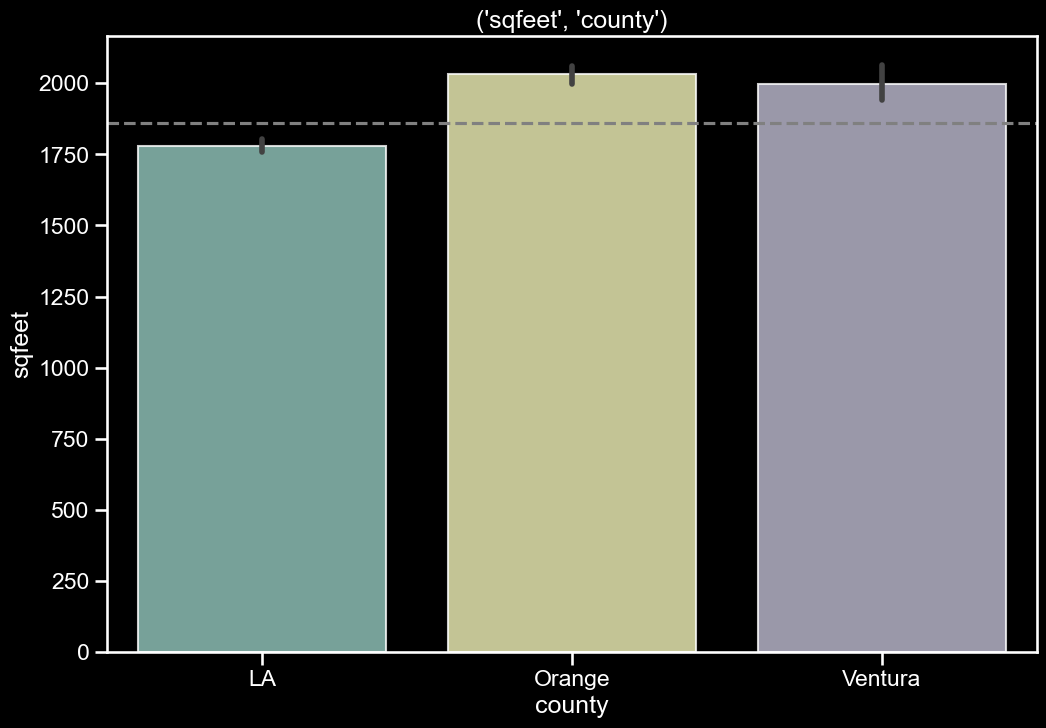

<Figure size 1200x800 with 0 Axes>

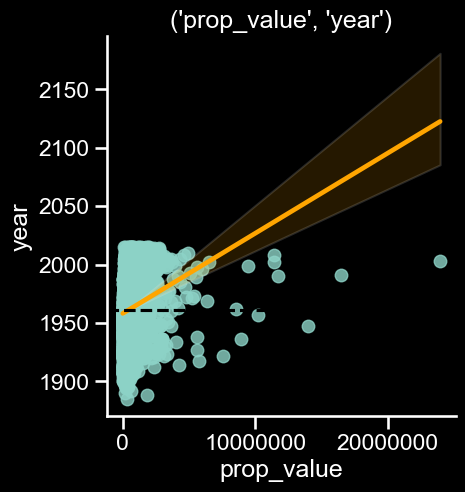

<Figure size 1200x800 with 0 Axes>

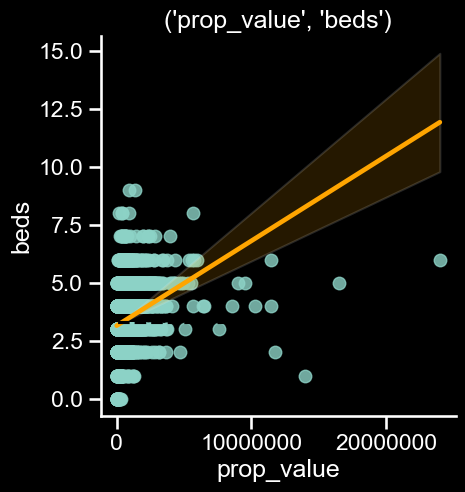

<Figure size 1200x800 with 0 Axes>

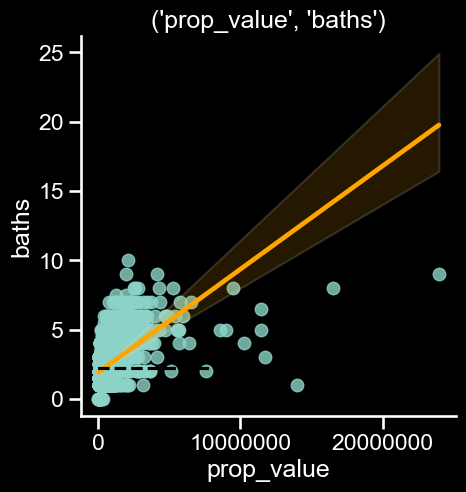

<Figure size 1200x800 with 0 Axes>

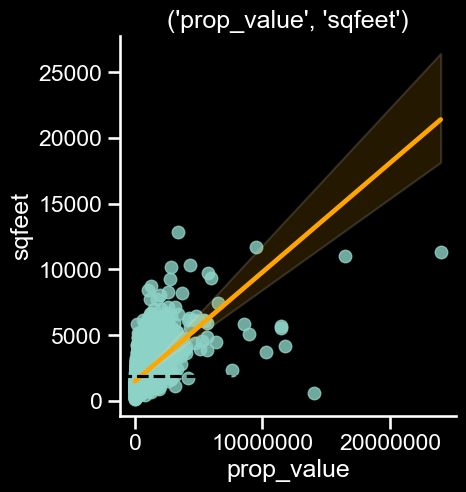

<Figure size 1200x800 with 0 Axes>

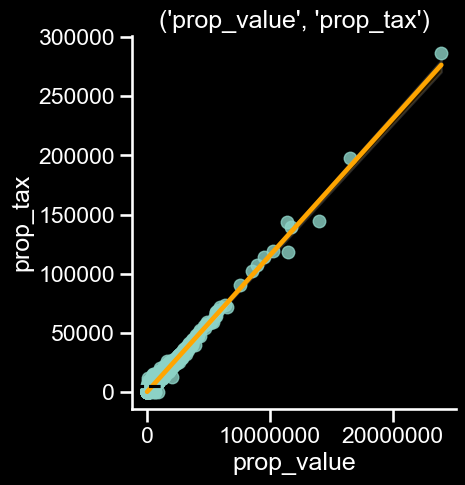

<Figure size 1200x800 with 0 Axes>

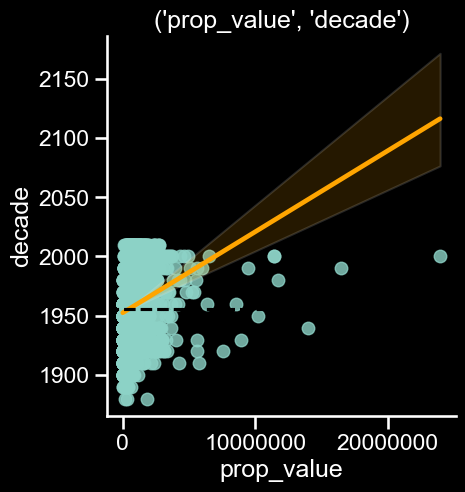

<Figure size 1200x800 with 0 Axes>

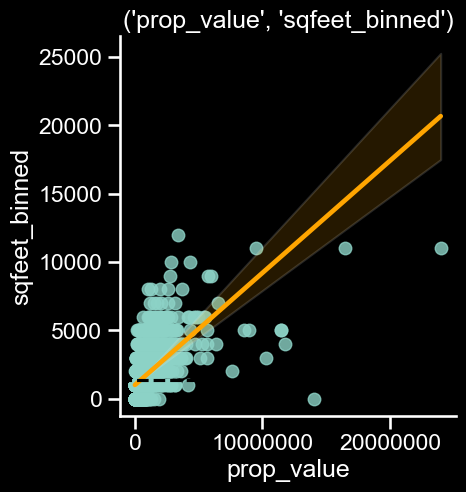

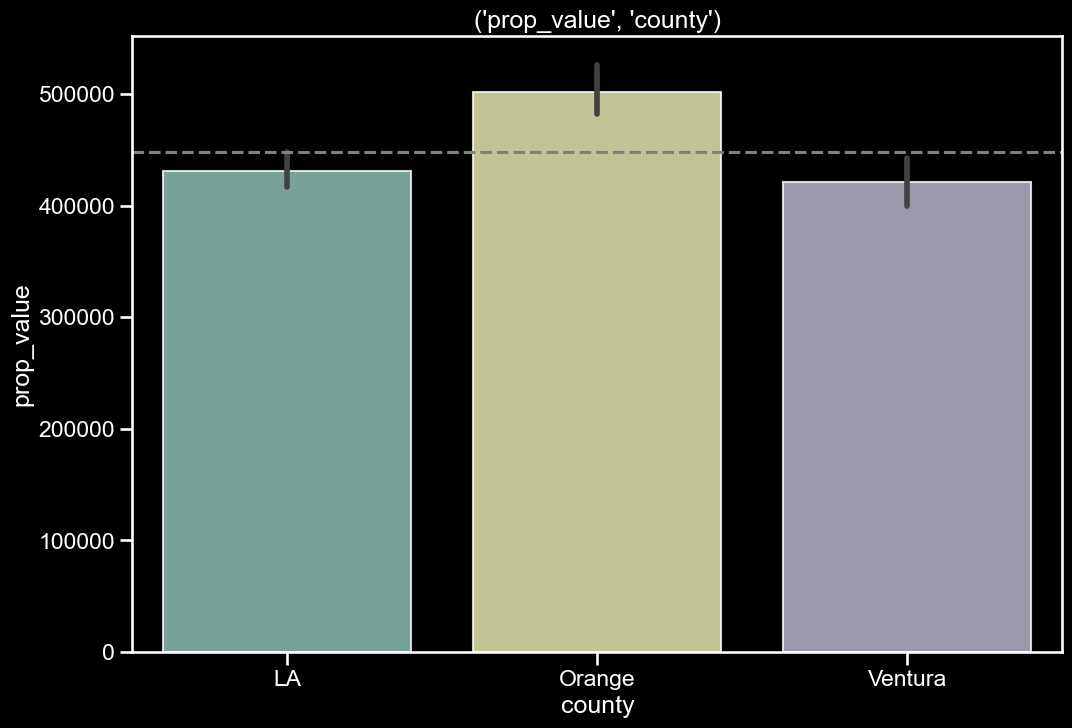

<Figure size 1200x800 with 0 Axes>

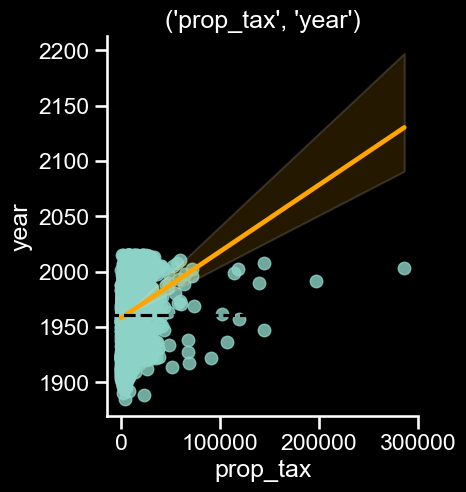

<Figure size 1200x800 with 0 Axes>

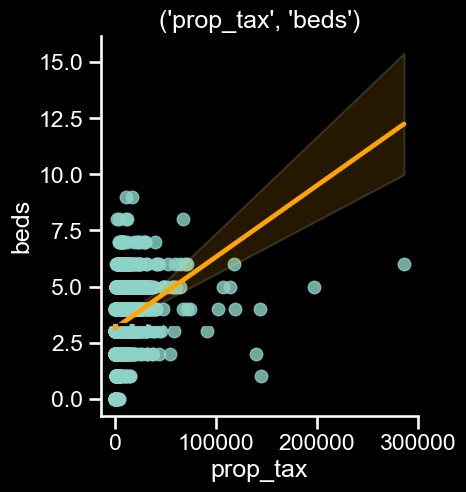

<Figure size 1200x800 with 0 Axes>

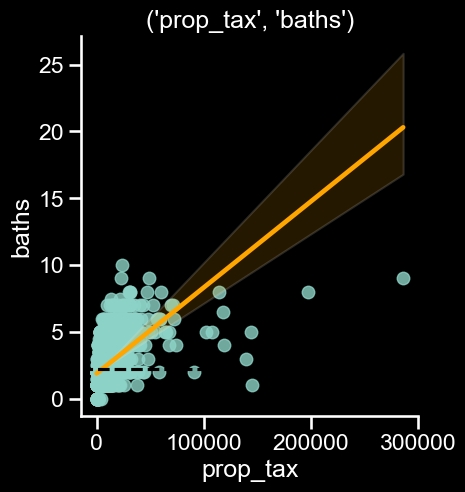

<Figure size 1200x800 with 0 Axes>

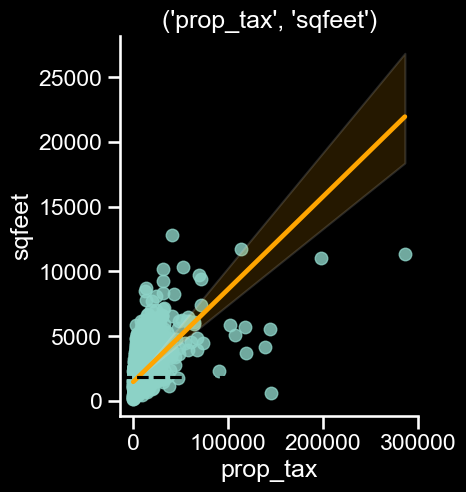

<Figure size 1200x800 with 0 Axes>

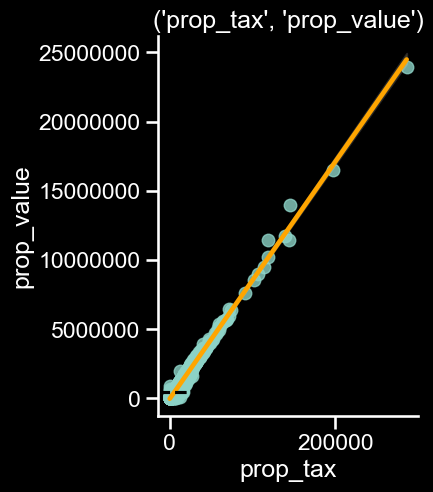

<Figure size 1200x800 with 0 Axes>

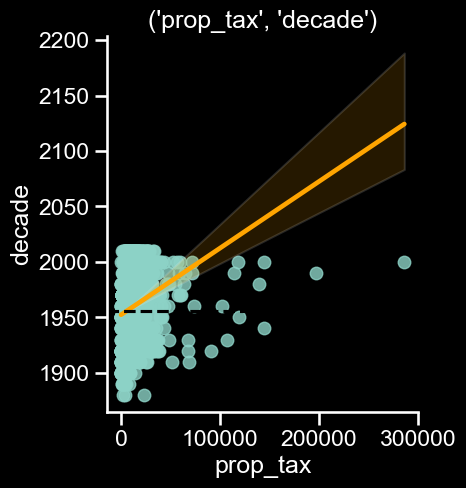

<Figure size 1200x800 with 0 Axes>

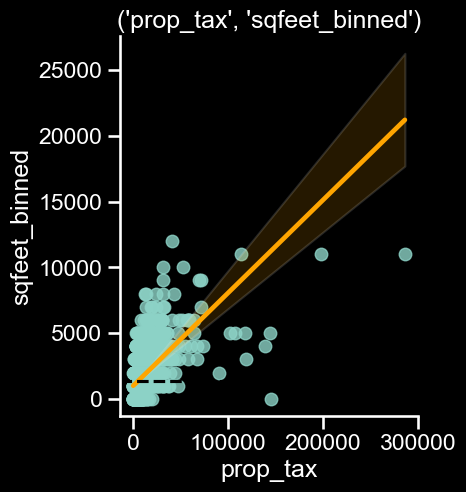

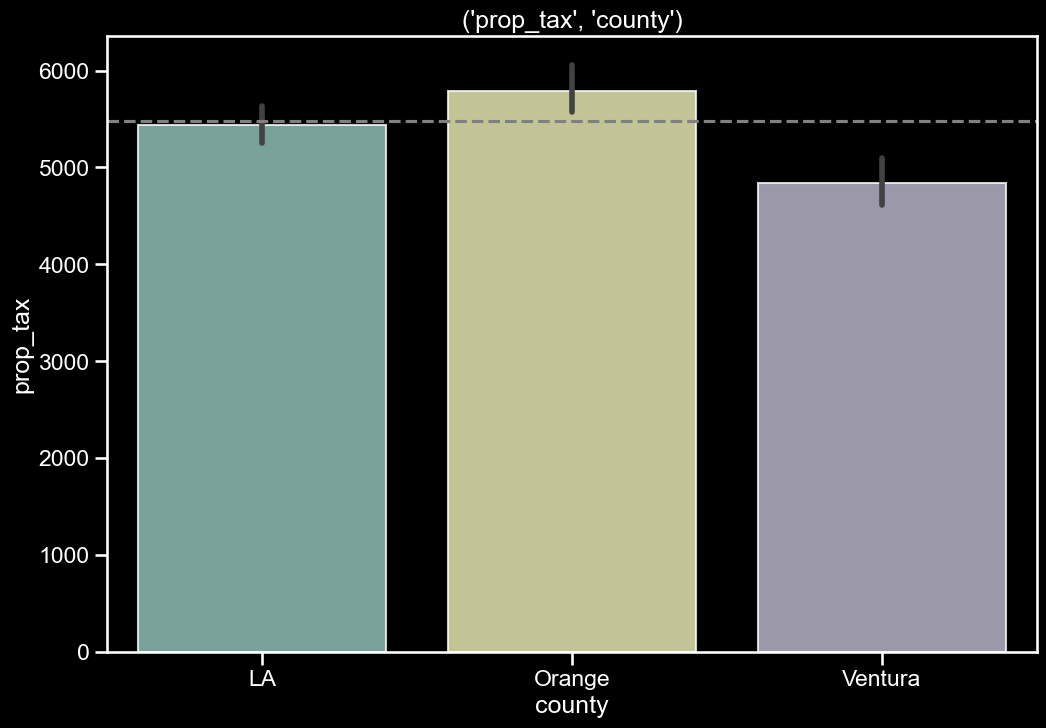

<Figure size 1200x800 with 0 Axes>

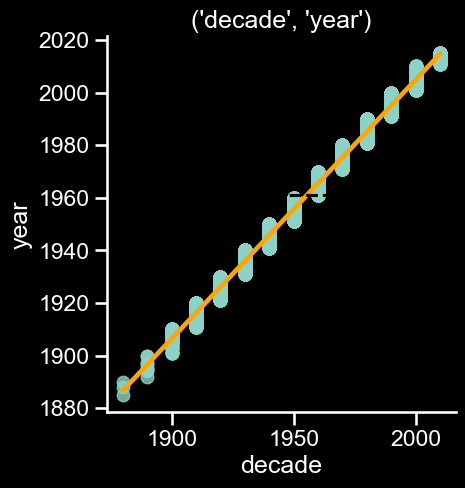

<Figure size 1200x800 with 0 Axes>

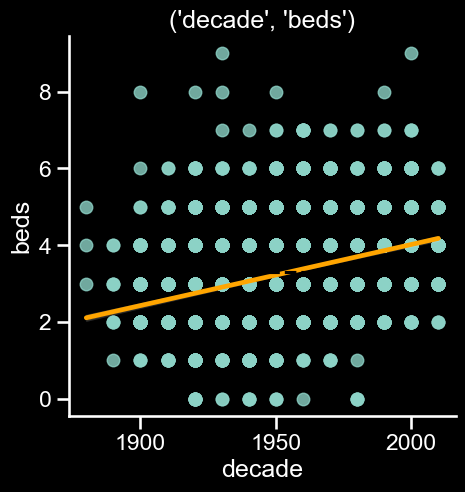

<Figure size 1200x800 with 0 Axes>

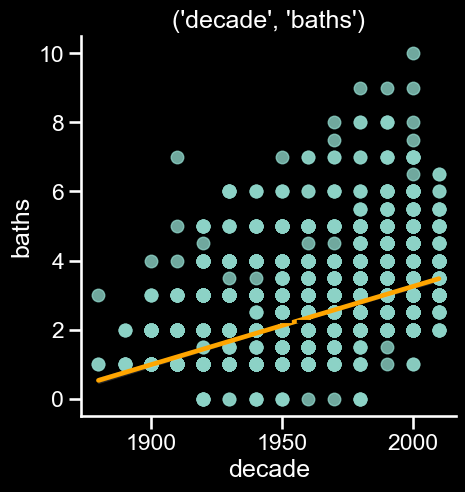

<Figure size 1200x800 with 0 Axes>

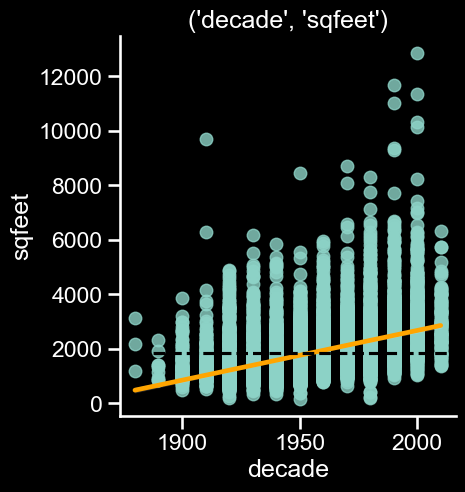

<Figure size 1200x800 with 0 Axes>

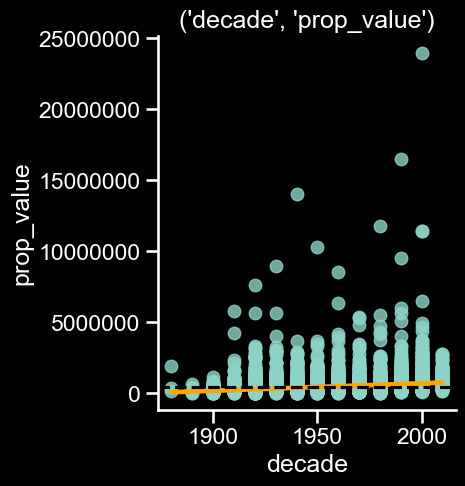

<Figure size 1200x800 with 0 Axes>

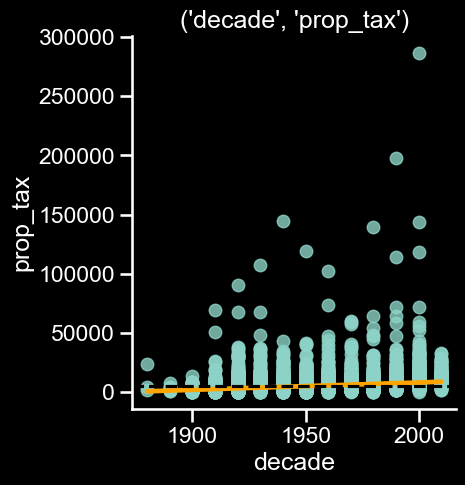

<Figure size 1200x800 with 0 Axes>

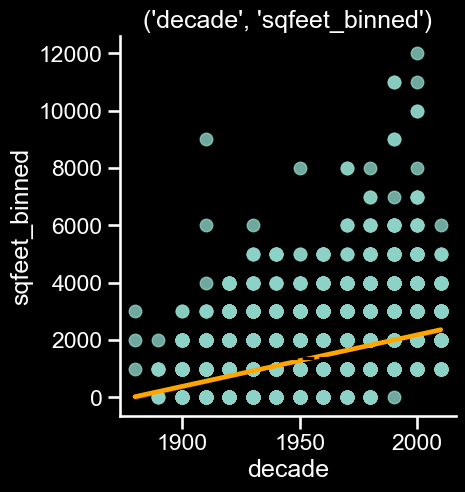

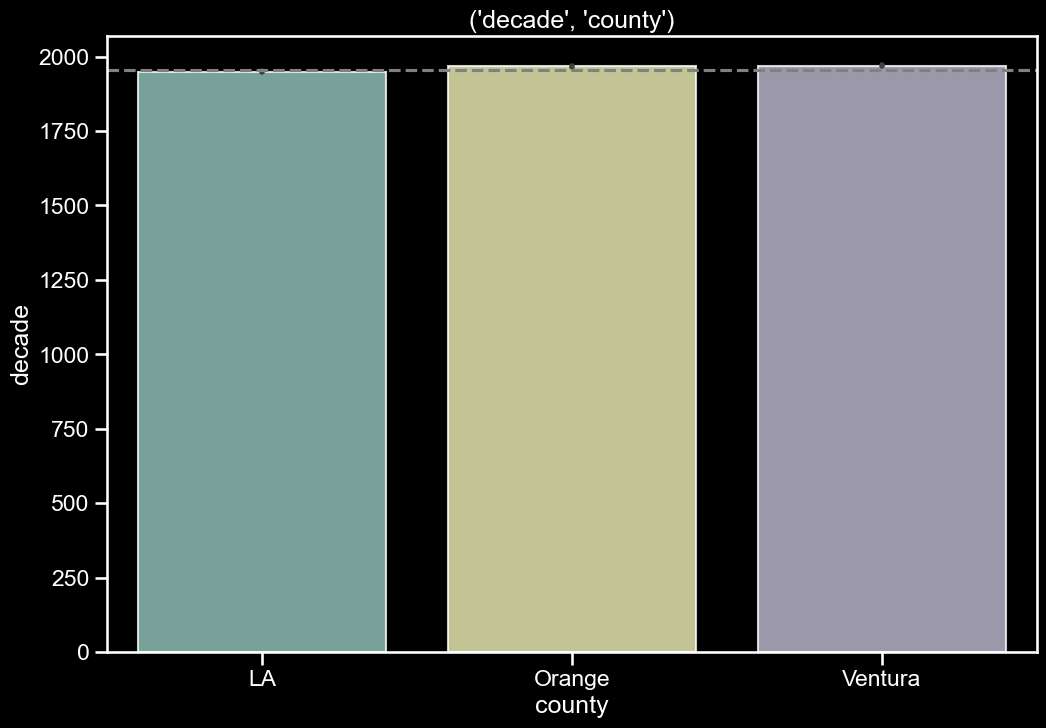

<Figure size 1200x800 with 0 Axes>

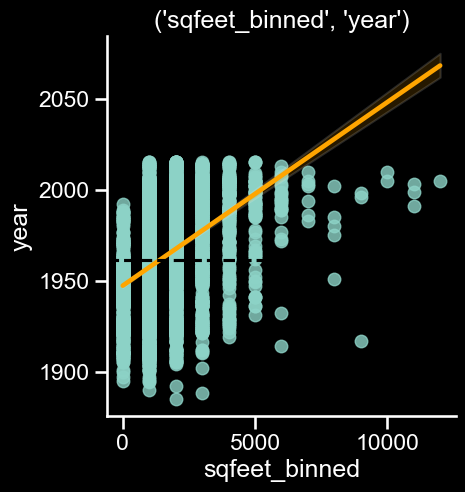

<Figure size 1200x800 with 0 Axes>

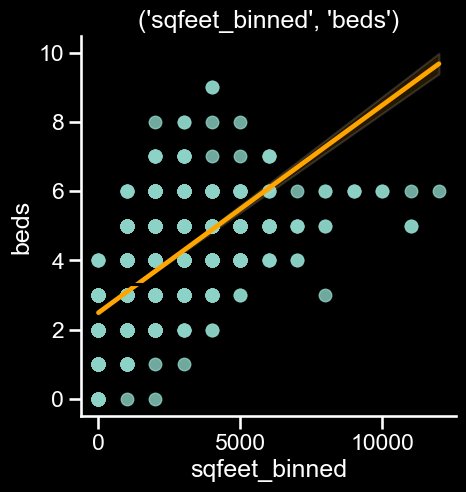

<Figure size 1200x800 with 0 Axes>

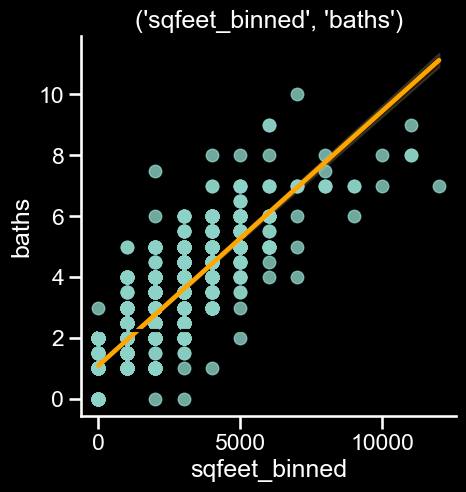

<Figure size 1200x800 with 0 Axes>

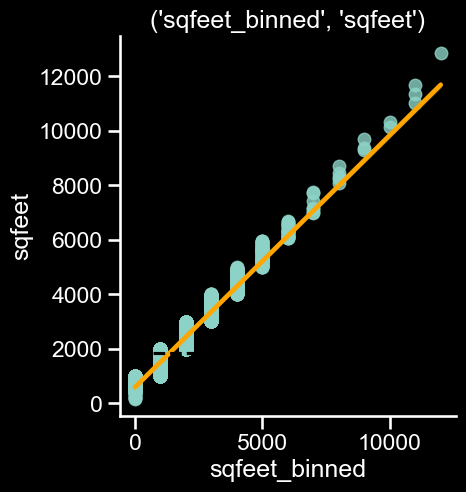

<Figure size 1200x800 with 0 Axes>

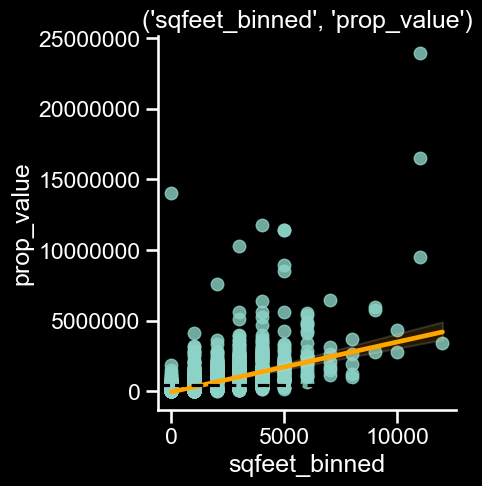

<Figure size 1200x800 with 0 Axes>

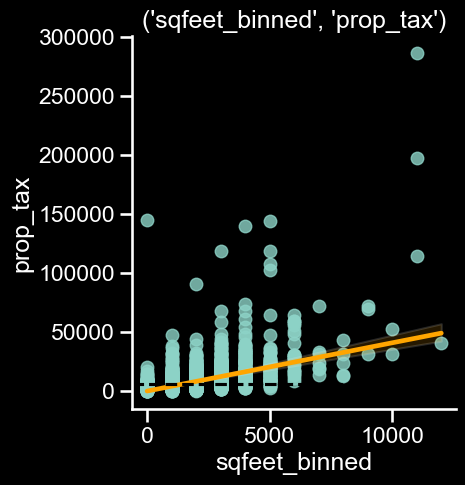

<Figure size 1200x800 with 0 Axes>

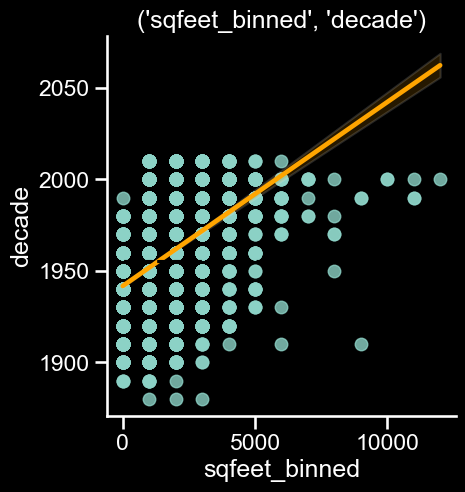

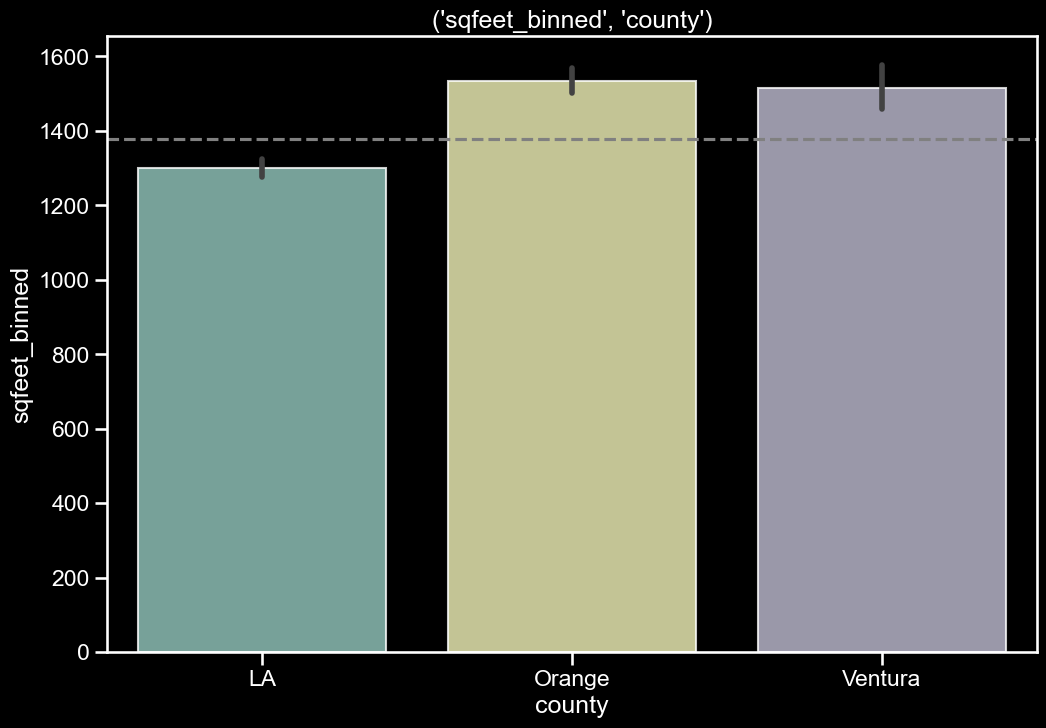

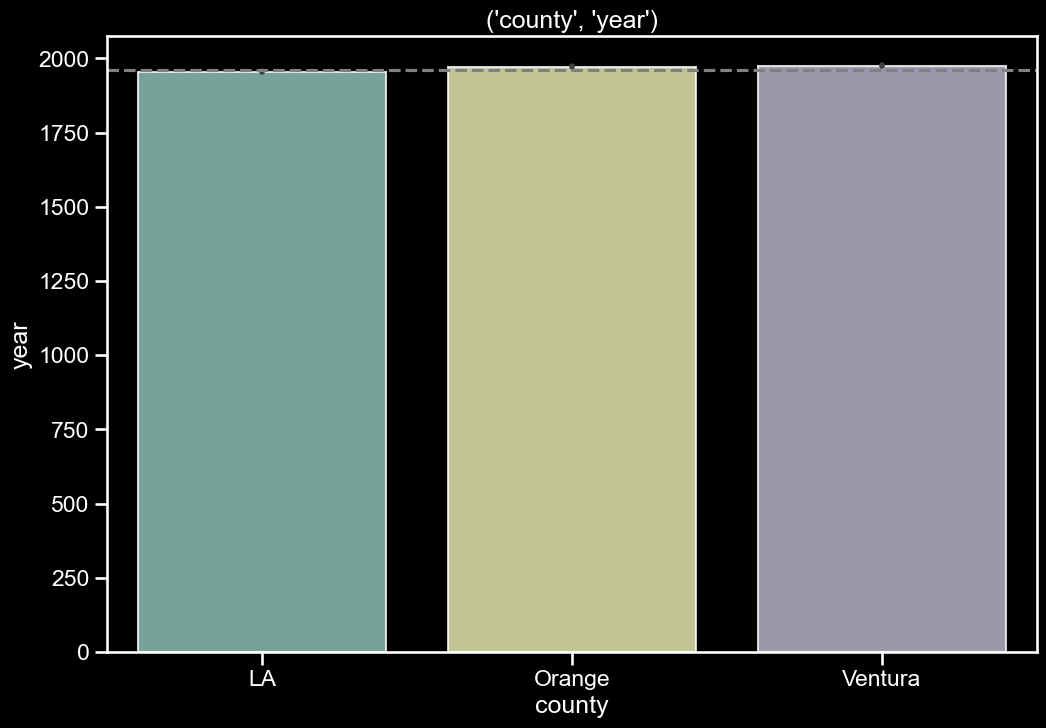

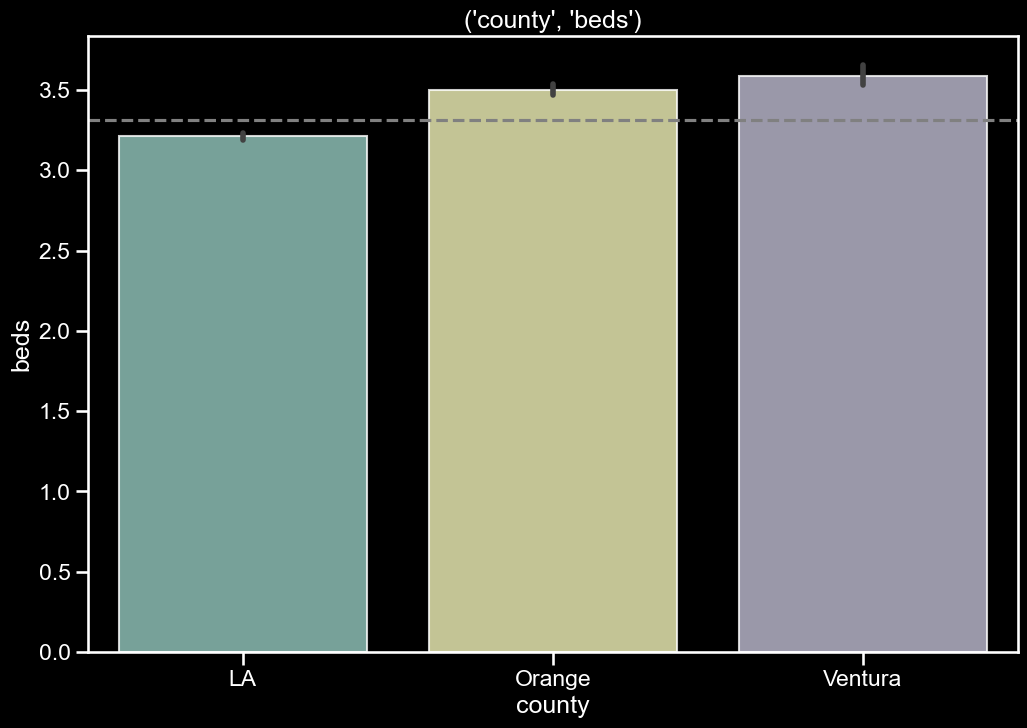

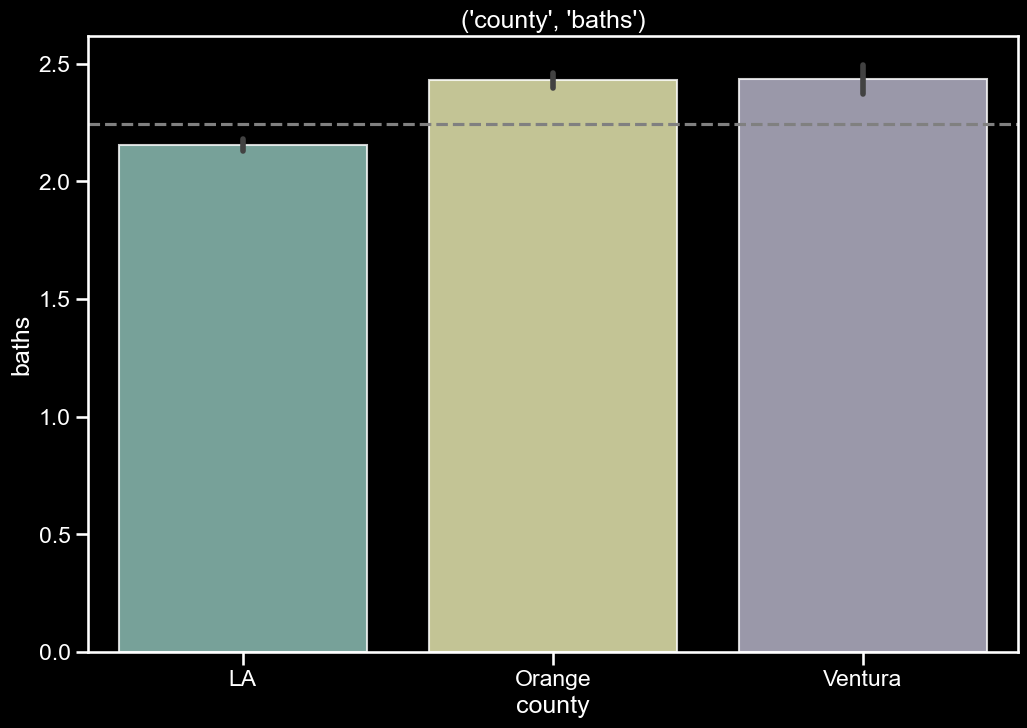

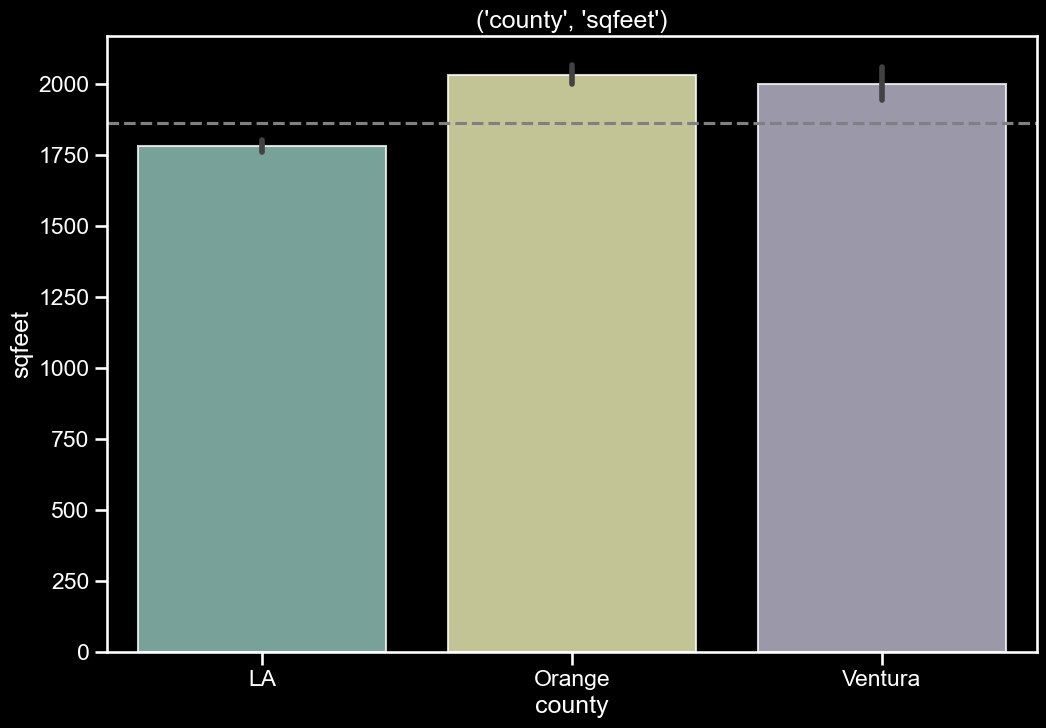

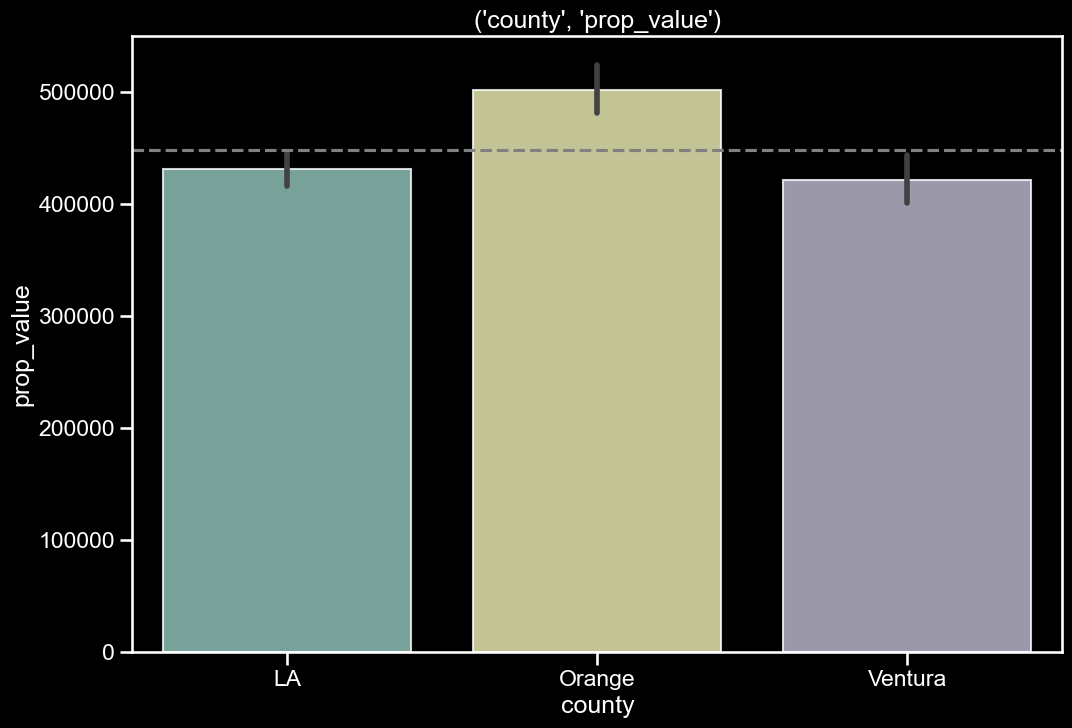

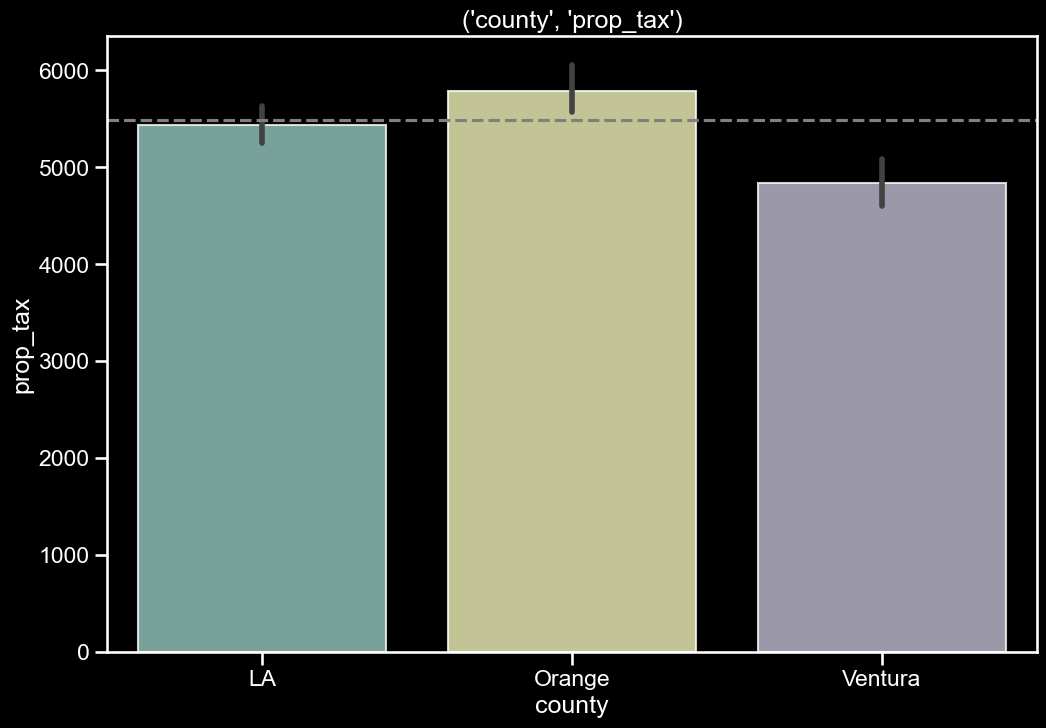

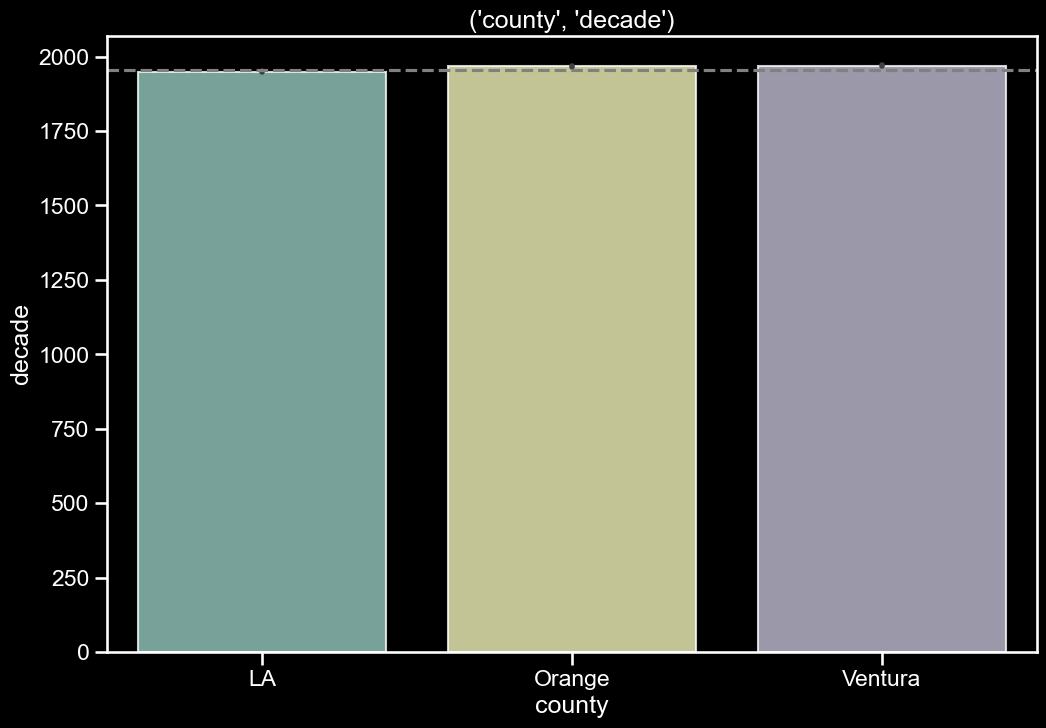

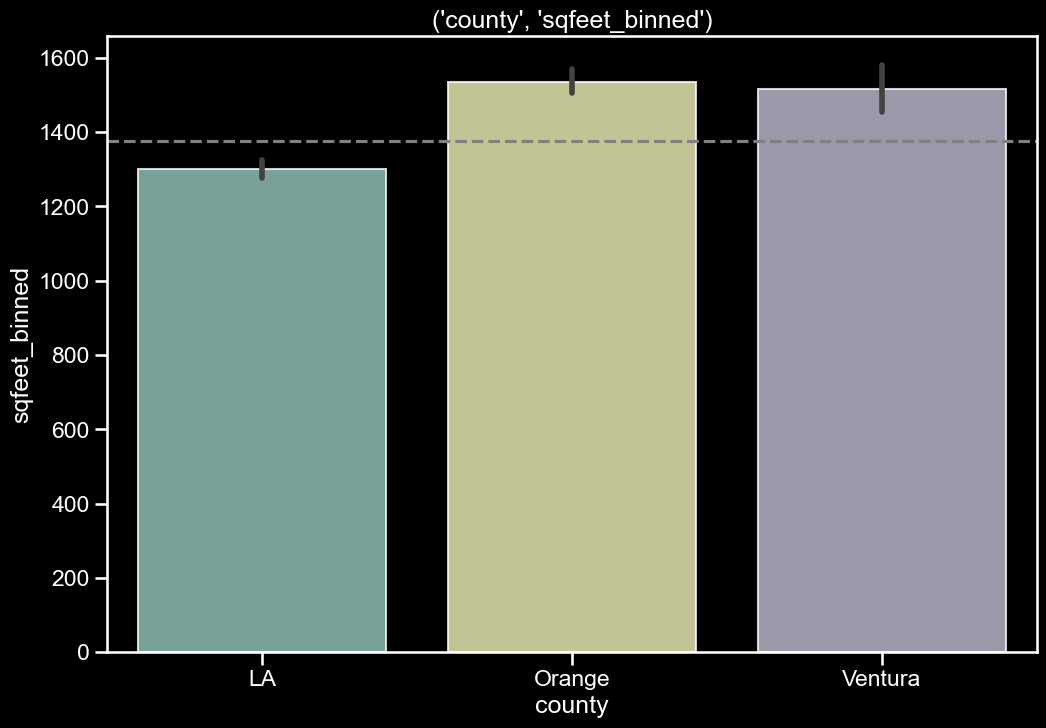

<Figure size 1200x800 with 0 Axes>

In [25]:
import itertools

cols = [
    "year",
    "beds",
    "baths",
    "sqfeet",
    "prop_value",
    "prop_tax",
    "decade",
    "sqfeet_binned",
    "county",
]


for col in itertools.permutations(cols, 2):
    # cat
    if col[1] == "county":
        sns.barplot(x=col[1], y=col[0], data=sm_df, alpha=0.8)
        overall_rate = sm_df[col[0]].mean()
        plt.axhline(overall_rate, ls="--", color="gray")
    elif col[0] == "county":
        sns.barplot(x=col[0], y=col[1], data=sm_df, alpha=0.8)
        overall_rate = sm_df[col[1]].mean()
        plt.axhline(overall_rate, ls="--", color="gray")
    else:
        average = sm_df[col[1]].mean()
        sns.lmplot(x=col[0], y=col[1], data=sm_df, line_kws={"color": "orange"})
        plt.axhline(average, ls="--", color="black")
    plt.title(col)
    plt.show()
    plt.figure(figsize=(12, 8))

# for col in itertools.permutations(cols, 2):
#     # cat
#     if col[1] == "county" or col[1] == "decade" or col[1] == "sqfeet_binned":
#         sns.barplot(x=col[1], y=col[0], data=sm_df, alpha=0.8)
#         overall_rate = train[col[0]].mean()
#         plt.axhline(overall_rate, ls="--", color="gray")
#     elif col[0] == "county" or col[0] == "decade" or col[0] == "sqfeet_binned":
#         sns.barplot(x=col[0], y=col[1], data=sm_df, alpha=0.8)
#         overall_rate = train[col[1]].mean()
#         plt.axhline(overall_rate, ls="--", color="gray")
#     else:
#         average = train[col[1]].mean()
#         sns.lmplot(x=col[0], y=col[1], data=sm_df, line_kws={"color": "orange"})
#         plt.axhline(average, ls="--", color="black")
#     plt.title(col)
#     plt.show()

### 9. 

Run the appropriate statistical tests where needed.



In [26]:
sm_df.columns

Index(['year', 'beds', 'baths', 'sqfeet', 'prop_value', 'prop_tax', 'county',
       'decade', 'sqfeet_binned'],
      dtype='object')

In [31]:
from scipy import stats


def ttest_all_vars(df, target_col):
    """
    Performs a t-test for all variables in a dataframe with respect to a target column.

    Parameters:
    df (pandas.DataFrame): The input dataframe.
    target_col (str): The name of the target column.
    """
    cols = df.columns.tolist()
    cols.remove(target_col)
    cond = df[target_col] == 0
    neg_outcome = df.loc[cond, cols]
    pos_outcome = df.loc[~cond, cols]
    for col in cols:
        if len(neg_outcome[col]) == 0 or len(pos_outcome[col]) == 0:
            print(f"{col}: One or both groups are empty")
        else:
            t, p = stats.ttest_ind(neg_outcome[col], pos_outcome[col])
            print(f"{col}: t = {t:.5f}, with p-value = {p:.5f}")

In [ ]:
# Chi2 Loop?

# T Test Loop?

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [33]:
check_columns(sm_df)

Column Name  Number of Unique Values  \
0           year                      124   
1           beds                       10   
2          baths                       18   
3         sqfeet                     2888   
4     prop_value                     9307   
5       prop_tax                     6425   
6         county                        3   
7         decade                       14   
8  sqfeet_binned                       13   

                                       Unique Values  Number of Null Values  \
0  [1963, 1998, 1992, 1950, 1958, 1962, 1955, 201...                      0   
1                     [3, 2, 4, 6, 5, 1, 7, 8, 9, 0]                      0   
2  [2.0, 2.5, 3.5, 3.0, 1.0, 4.0, 6.0, 4.5, 5.0, ...                      0   
3  [1410, 1927, 3293, 1568, 1255, 1511, 1300, 270...                      0   
4  [186697, 587421, 796473, 848481, 251385, 85611...                      0   
5  [2762, 7195, 9392, 10316, 3129, 1273, 4528, 13...                      0   
6                              [LA, Orange, Ventura]                      0   
7  [1960, 1990, 1940, 1950, 2010, 1980, 2000, 193...                      0   
8  [1000, 3000, 2000, 0, 4000, 6000, 9000, 5000, ...                      0   

   Proportion of Null Values    dtype  
0                        0.0    int64  
1                        0.0    int64  
2                        0.0  float64  
3                        0.0    int64  
4                        0.0    int64  
5                        0.0    int64  
6                        0.0   object  
7                        0.0    int64  
8                        0.0    int64

### 10. 

What independent variables are correlated with the dependent variable, home value?

Index(['year', 'beds', 'baths', 'sqfeet', 'prop_value', 'prop_tax', 'county',
       'decade', 'sqfeet_binned'],
      dtype='object')

### 11. 

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### 12. 

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. 

Explore your dataset with any other visualizations you think will be helpful.

## Notes